#  <span style="color:red"> <p style="text-align:center"> Customer Churn Prediction </p></span>


Made By  : **Archita Agrawal**



# Overview

At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this, we want to develop a machine learning model that predicts customer churn. Your task as a Machine Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job description.

## **Business Case** :Predicting Churn (0,1)

Using Machine Learning and various data science libraries to build a model that can reliably predict the churn. We will use the following pipeline to create a reliable model:

- Problem Definition
- Data 
- Explorartory Data Analysis
- Data Preprocessing
- Feature Selection
- Model Selection
- HyperParameter Tunning
- Model Evaluation
- Feature Importance

## Problem Definition

Goal is to predict Churn.
- 0
- 1

## Data
The Data provided by SunBase:

Database details: 

"customer_churn_large_dataset.xlsx"

Using both Training and Testing Data.

## Evaluation

If we can predict the target variable ( whether the ML model is predicting Churn 0 or 1 ).

## Features

Various features will be identified and detailed

## Create Data Dictionary

We are provided a dataset with 8 columns which are as below:

- <span style="color:red">CustomerID </span>
- <span style="color:red">Name </span> 
- <span style="color:red">Gender </span> 
- <span style="color:red">Location </span> 
- <span style="color:red">Subscription_length_months </span> 
- <span style="color:red">Monthly_bill </span> 
- <span style="color:red">Total_Usage_GB</span> 
- <span style="color:red">Churn </span> 


### Setting Up the tools

In [1]:
#Installed some libary
#!pip install sweetviz
#!pip3 install xgboost
#!pip install -U imbalanced-learn
#!pip install category_encoders
#!pip install catboost

# All the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv
from scipy import stats
import os
import plotly.express as px
import pickle

# Setting file to be displayed with maximum columns and maximum rows 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# For encoding the column 
from category_encoders import TargetEncoder

# For importing chi square
from sklearn.feature_selection import chi2
%matplotlib inline 


# Get rid of all the warnings
import warnings 
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#For Balancing the data Improting imblearn
from imblearn.over_sampling import SMOTE

# To convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# importing counter to check count of each label
from collections import Counter

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,f1_score,make_scorer

#stratified sampling instead of random sampling using Stratified Kfold
from sklearn.model_selection import StratifiedKFold

### DataSet

In [2]:
# Loading data from table 
customer_record=pd.read_excel("customer_churn_large_dataset.xlsx")

<h4 style=color:green>Data got loaded and save into customer_record variable</h4>

### Basic Checks

In [3]:
# Retriving data
customer_record

CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76             172      0  
2                               5         85.47             460      0  
3                               3         97.94             297      1  
4                              19         58.14             266      0  
...                           ...           ...             ...    ...  
99995                          23         55.13             226      1  
99996                          19         61.65             351      0  
99997                          17         96.11             251      1  
99998                          20         49.25             434      1  
99999                          19         76.57             173      1  

[100000 rows x 9 columns]

<h4 style=color:green>Data retrived as its showing 100000 rows and 9 column is there</h4>

In [4]:
# Showing First 10 rows from dataset
customer_record.head(10)

CustomerID         Name  Age  Gender     Location  \
0           1   Customer_1   63    Male  Los Angeles   
1           2   Customer_2   62  Female     New York   
2           3   Customer_3   24  Female  Los Angeles   
3           4   Customer_4   36  Female        Miami   
4           5   Customer_5   46  Female        Miami   
5           6   Customer_6   67    Male     New York   
6           7   Customer_7   30  Female      Chicago   
7           8   Customer_8   67  Female        Miami   
8           9   Customer_9   20  Female        Miami   
9          10  Customer_10   53  Female  Los Angeles   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  
5                          15         82.65             456      1  
6                           3         73.79             269      0  
7                           1         97.70             396      1  
8                          10         42.45             150      1  
9                          12         64.49             383      1

<h4 style=color:green>From starting 10 rows are shown above</h3>

In [5]:
# Showing last 10 rows from dataset
customer_record.tail(10)

CustomerID             Name  Age  Gender     Location  \
99990       99991   Customer_99991   62    Male      Chicago   
99991       99992   Customer_99992   55  Female        Miami   
99992       99993   Customer_99993   44    Male     New York   
99993       99994   Customer_99994   20  Female      Houston   
99994       99995   Customer_99995   47  Female      Houston   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
99990                           9         36.34             432      0  
99991                          14         73.87             324      1  
99992                          18         45.87             229      0  
99993                          15         84.72             312      1  
99994                           8         34.58             200      0  
99995                          23         55.13             226      1  
99996                          19         61.65             351      0  
99997                          17         96.11             251      1  
99998                          20         49.25             434      1  
99999                          19         76.57             173      1

<h4 style=color:green>Last 10 rows are shown above</h4>

In [6]:
# Displaying information of the dataset ie. column name,datatype,no of rows and how many int,float,str etc
customer_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


<h4 style=color:green>Total 100000 rows are there and 5 column is of int datatype , 1 column float datatype and 3 column is object data type</h4>

In [7]:
# It will check whether the dataset is having null value or not
customer_record.isnull()

CustomerID   Name    Age  Gender  Location  Subscription_Length_Months  \
0           False  False  False   False     False                       False   
1           False  False  False   False     False                       False   
2           False  False  False   False     False                       False   
3           False  False  False   False     False                       False   
4           False  False  False   False     False                       False   
...           ...    ...    ...     ...       ...                         ...   
99995       False  False  False   False     False                       False   
99996       False  False  False   False     False                       False   
99997       False  False  False   False     False                       False   
99998       False  False  False   False     False                       False   
99999       False  False  False   False     False                       False   

       Monthly_Bill  Total_Usage_GB  Churn  
0             False           False  False  
1             False           False  False  
2             False           False  False  
3             False           False  False  
4             False           False  False  
...             ...             ...    ...  
99995         False           False  False  
99996         False           False  False  
99997         False           False  False  
99998         False           False  False  
99999         False           False  False  

[100000 rows x 9 columns]

<h4 style=color:green>As all column showing False,seems no null value is present.</h4>

In [8]:
# It will check how many null value is present in every column
customer_record.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<h4 style=color:green>No Null value present in dataset</h4>

In [9]:
# Checking descrption of the numercial column like, min,max,std,count
customer_record.describe()

CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.640000      387.000000       1.000000  
max       100.000000      500.000000       1.000000

<h4 style=color:green>
- Almost seems data are equally distributable<br>
- There is no constant columns(std=0) </h4>

In [10]:
# Checking description of the categorcial column like count,unique,top,freq
customer_record.describe(include=['O'])

Name  Gender Location
count       100000  100000   100000
unique      100000       2        5
top     Customer_1  Female  Houston
freq             1   50216    20157

<h4 style=color:green> Description of object columns, there is no null values in the columns</h4>

In [11]:
# Checking the shape of the dataset
customer_record.shape

(100000, 9)

In [12]:
#Target values
customer_record.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

<h4 style=color:green> In Churn almost both value is equal</h4>

## Explorartory Data Analysis

We will perform three types of analysis

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### 1.Univariate Analysis

#### A. Age

In [13]:
# Just making copy of dataset
customer_record_copy=customer_record.copy()

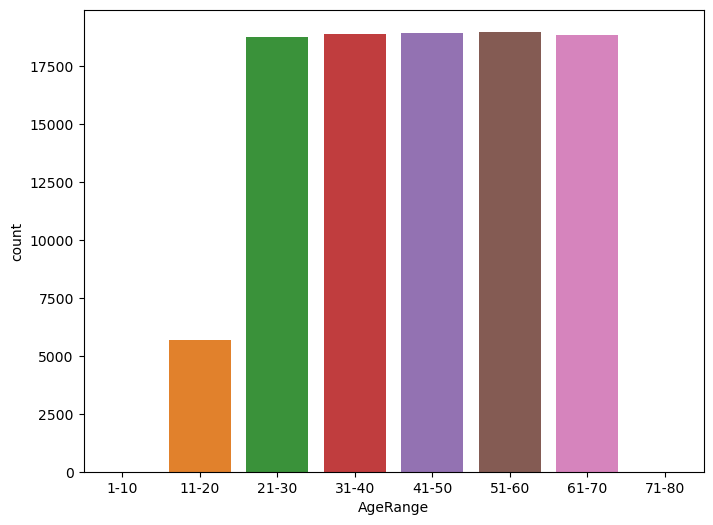

In [14]:
# Convert the 'Age' column to integer data type
customer_record_copy['Age'] = customer_record_copy['Age'].astype(int)

# Define the age ranges and corresponding labels
age_ranges = [-1, 10, 20, 30, 40, 50, 60,70,80]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80']

# Create a new column 'AgeRange' based on the age ranges
customer_record_copy['AgeRange'] = pd.cut(customer_record_copy['Age'], bins=age_ranges, labels=age_labels)

# Create a figure with a size of 8x6 inches
plt.figure(figsize=(8, 6))

# Create a count plot of 'AgeRange' column
sns.countplot(x='AgeRange', data=customer_record_copy)

# Show the plot
plt.show()


<h4 style=color:green> Distribution is normal,employees between 11-20 age group is less as compared to others.Seems 51-60 age group is highest to use .</h4>

#### B. Gender

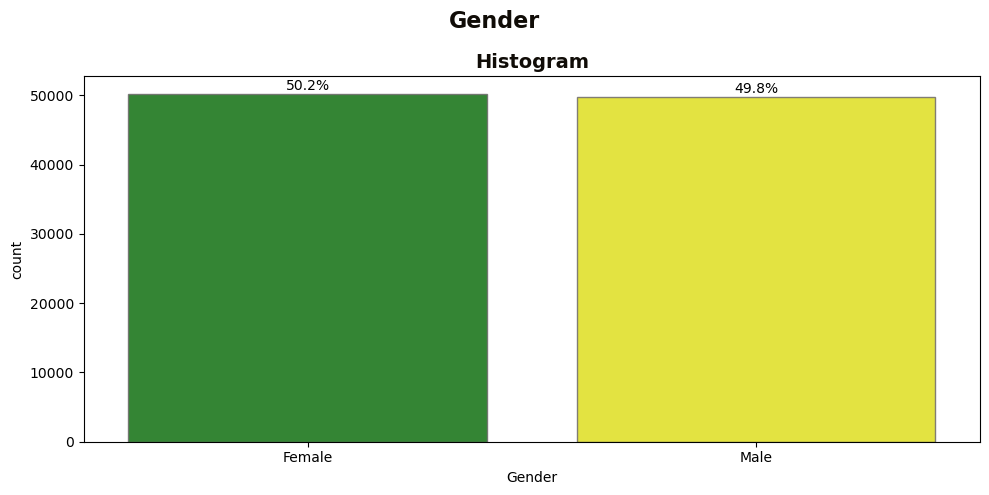

In [15]:
# Set color palette
colors = ['green', 'yellow', 'orange']

# Define order of categories based on their counts
order = (customer_record['Gender'].value_counts() / len(customer_record) * 100).index

# Create figure and set size
fig, ax = plt.subplots(figsize=(10, 5))

# Set title and subtitle
ax.set_title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#100C07')
fig.suptitle('Gender', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color='#100C07')

# Create histogram
sns.countplot(x='Gender', data=customer_record, palette=colors, order=order,
                   edgecolor='#6D6A6A', alpha=0.85, ax=ax)

# Add percentage labels to bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(customer_record):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Set x-axis label rotation
plt.xticks(rotation=0) 

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<h4 style=color:green> Distribution is normal,both male and female customer is equal..</h4>

#### C. Location

In [16]:
import plotly.graph_objects as go

population_df = (
    customer_record.groupby(["Location"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["Location"])
)

labels = population_df["Location"].unique()
# group by count of the "population" column.
values = population_df["Counts"]

earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
]
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            # pull is given as a fraction of the pie radius
            pull=[0.07, 0.08, 0.02, 0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
            # iterate through earth_colors list to color individual pie pieces
            marker_colors=earth_colors,
        )
    ]
)
# Update layout to show a title
fig.update_layout(title_text="Location")
# display the figure
fig.show()

<h4 style=color:green> 1. Except New York all other city customer is equal distributed about 20 %.</h4>

#### D. Subscription Length Month

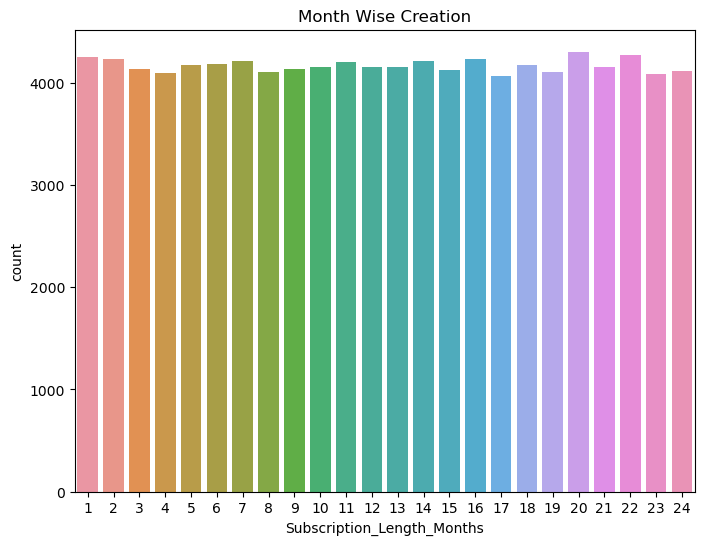

In [17]:
# Plotting the count plot graph thats show Month wise value in an ascending order
plt.figure(figsize=(8,6))
sns.countplot(x=customer_record["Subscription_Length_Months"].sort_values(),data=customer_record)
plt.title("Month Wise Creation")
plt.show()

<h4 style=color:green> Distribution is normal,above 4000 costumer is having all most per monthly subscription.<br>
    Mostly customer taken 20 month subscription which is highest on all
</h4>

#### E. Monthly_Bill

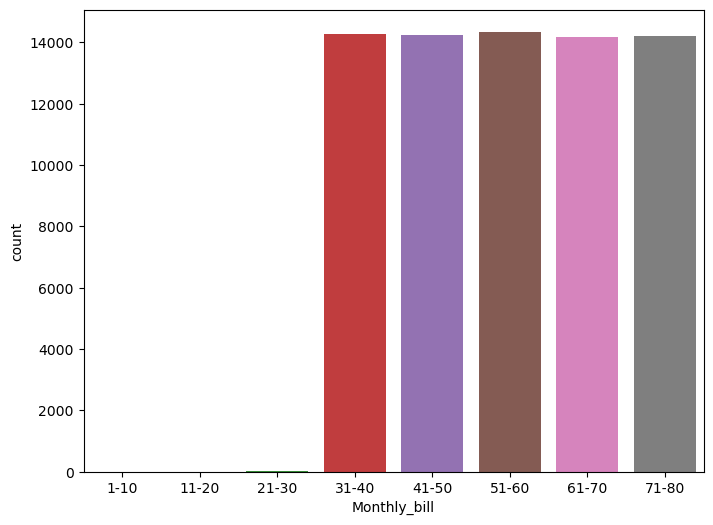

In [18]:
# Convert the 'Monthly_Bill' column to integer data type
customer_record_copy['Monthly_Bill'] = customer_record_copy['Monthly_Bill'].astype(float)

# Define the age ranges and corresponding labels
bill_ranges = [-1, 10, 20, 30, 40, 50, 60,70,80]
bill_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80']

# Create a new column 'AgeRange' based on the age ranges
customer_record_copy['Monthly_bill'] = pd.cut(customer_record_copy['Monthly_Bill'], bins=bill_ranges, labels=bill_labels)

# Create a figure with a size of 8x6 inches
plt.figure(figsize=(8, 6))

# Create a count plot of 'AgeRange' column
sns.countplot(x='Monthly_bill', data=customer_record_copy)

# Show the plot
plt.show()

<h4 style=color:green> 51-60 rs monthly bill paid by 14000 above customer.<br>
    Others bill month is also range from 31 to 80 rs monthly 
</h4>

#### F. Total_Usage_GB

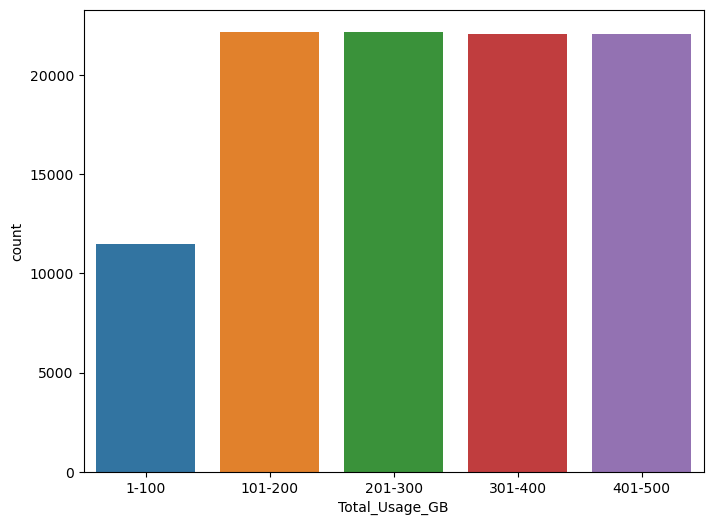

In [19]:
# Convert the 'Total_Usage_GB' column to integer data type
customer_record_copy['Total_Usage_GB'] = customer_record_copy['Total_Usage_GB'].astype(float)

# Define the age ranges and corresponding labels
bill_ranges = [1, 100, 200, 300, 400, 500]
bill_labels = ['1-100', '101-200', '201-300', '301-400', '401-500']

# Create a new column 'AgeRange' based on the age ranges
customer_record_copy['Total_Usage_GB'] = pd.cut(customer_record_copy['Total_Usage_GB'], bins=bill_ranges, labels=bill_labels)

# Create a figure with a size of 8x6 inches
plt.figure(figsize=(8, 6))

# Create a count plot of 'AgeRange' column
sns.countplot(x='Total_Usage_GB', data=customer_record_copy)

# Show the plot
plt.show()

<h4 style=color:green> 12000 customer approx usage 100 gb and other customer usage is very high from 101 to 500 gb 
</h4>

#### G. Churn

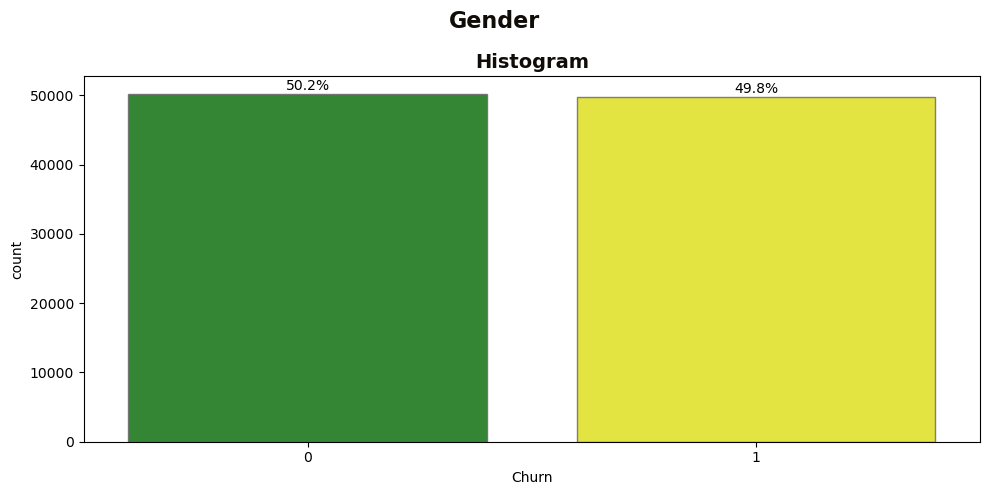

In [20]:
# Set color palette
colors = ['green', 'yellow', 'orange']

# Define order of categories based on their counts
order = (customer_record['Churn'].value_counts() / len(customer_record) * 100).index

# Create figure and set size
fig, ax = plt.subplots(figsize=(10, 5))

# Set title and subtitle
ax.set_title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#100C07')
fig.suptitle('Gender', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color='#100C07')

# Create histogram
sns.countplot(x='Churn', data=customer_record, palette=colors, order=order,
                   edgecolor='#6D6A6A', alpha=0.85, ax=ax)

# Add percentage labels to bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(customer_record):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Set x-axis label rotation
plt.xticks(rotation=0) 

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<h4 style=color:green> 50% customer is not churned and 49% customer is churned . this is the target variable that we have to predict
</h4>

## 2. Bivariate Analysis

### Age vs. Total_Usage_GB

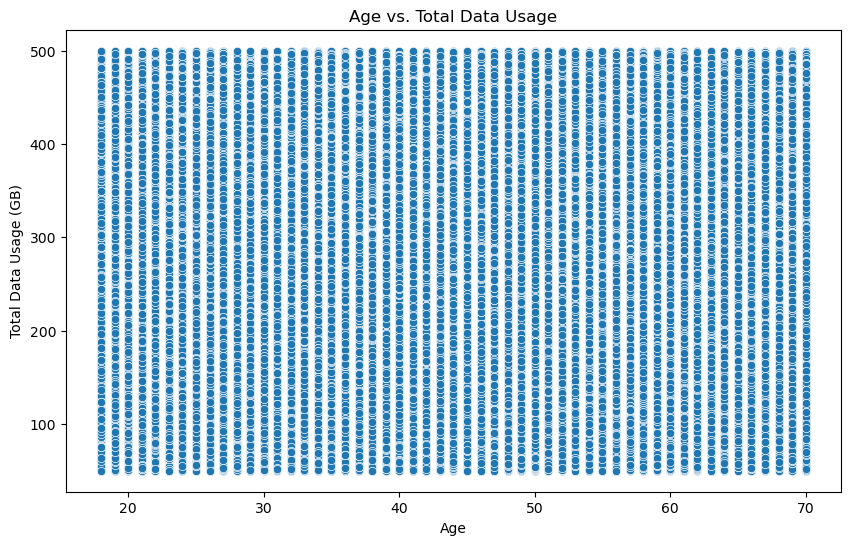

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_Usage_GB', data=customer_record)
plt.title('Age vs. Total Data Usage')
plt.xlabel('Age')
plt.ylabel('Total Data Usage (GB)')
plt.show()

In [22]:
correlation = customer_record['Age'].corr(customer_record['Total_Usage_GB'])
print(f"Correlation between Age and Total Data Usage: {correlation}")

Correlation between Age and Total Data Usage: 0.0019267207916287441


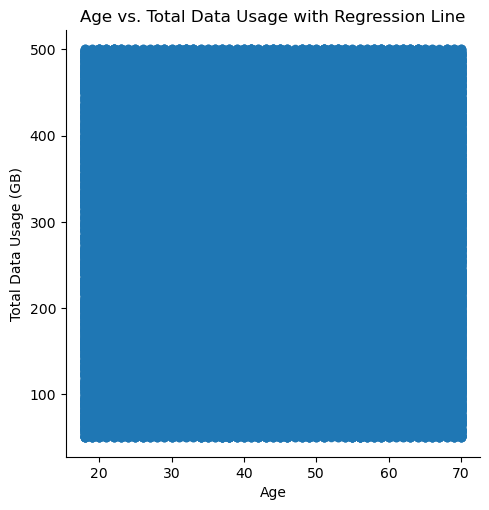

In [23]:
sns.lmplot(x='Age', y='Total_Usage_GB', data=customer_record)
plt.title('Age vs. Total Data Usage with Regression Line')
plt.xlabel('Age')
plt.ylabel('Total Data Usage (GB)')
plt.show()


<h4 style=color:green> Correlation between age and total_data_usage is shown above<br>Correlation between Age and Total Data Usage: 0.0019267207916287441
</h4>

### Monthly_Bill vs. Total_Usage_GB

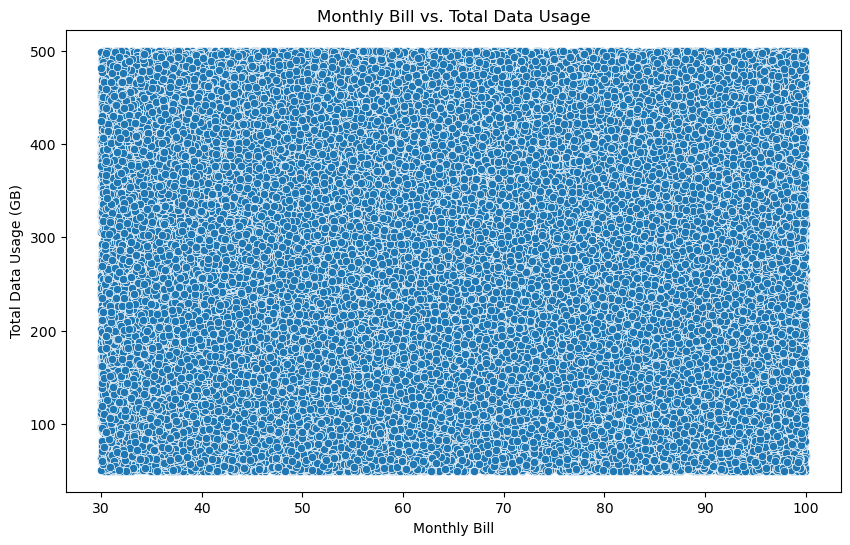

In [24]:
#Created a scatter plot to visualize the relationship between monthly bills and total data usage.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly_Bill', y='Total_Usage_GB', data=customer_record)
plt.title('Monthly Bill vs. Total Data Usage')
plt.xlabel('Monthly Bill')
plt.ylabel('Total Data Usage (GB)')
plt.show()


In [25]:
# Calculated the correlation coefficient to quantify the relationship between monthly bills and total data usage.
correlation = customer_record['Monthly_Bill'].corr(customer_record['Total_Usage_GB'])
print(f"Correlation between Monthly Bill and Total Data Usage: {correlation}")


Correlation between Monthly Bill and Total Data Usage: 0.003186610555916193


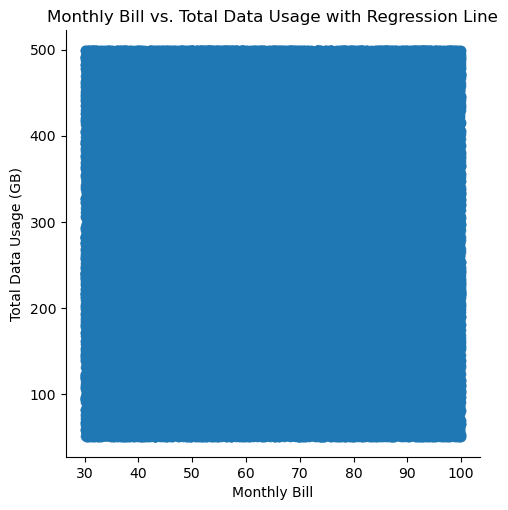

In [26]:
# fitted a linear regression line to the scatter plot to see the trend more clearly.
sns.lmplot(x='Monthly_Bill', y='Total_Usage_GB', data=customer_record)
plt.title('Monthly Bill vs. Total Data Usage with Regression Line')
plt.xlabel('Monthly Bill')
plt.ylabel('Total Data Usage (GB)')
plt.show()


###  Gender vs. Churn: Analyzing how gender might influence churn rates.

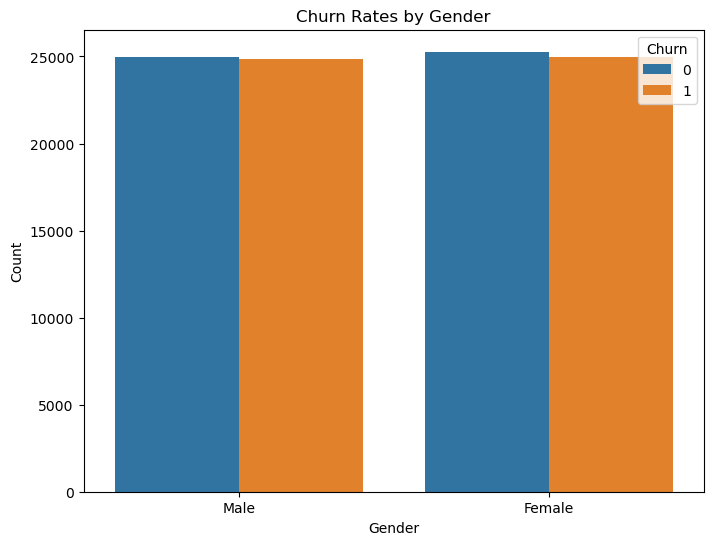

In [27]:
# Create a bar plot to visualize the churn rates based on gender.

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Churn', data=customer_record)
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


In [28]:
#Calculated churn rates for each gender.

churn_rates = customer_record.groupby('Gender')['Churn'].mean()
print("Churn Rates by Gender:")
print(churn_rates)


Churn Rates by Gender:
Gender
Female    0.496734
Male      0.498855
Name: Churn, dtype: float64


In [29]:
#Performed statistical tests to determine if the difference in churn rates between genders is significant. 

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(customer_record['Gender'], customer_record['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared statistic: 0.4413972946971719
P-value: 0.5064488106432634


### Location vs. Churn: Examining whether customer location is related to churn behavior.

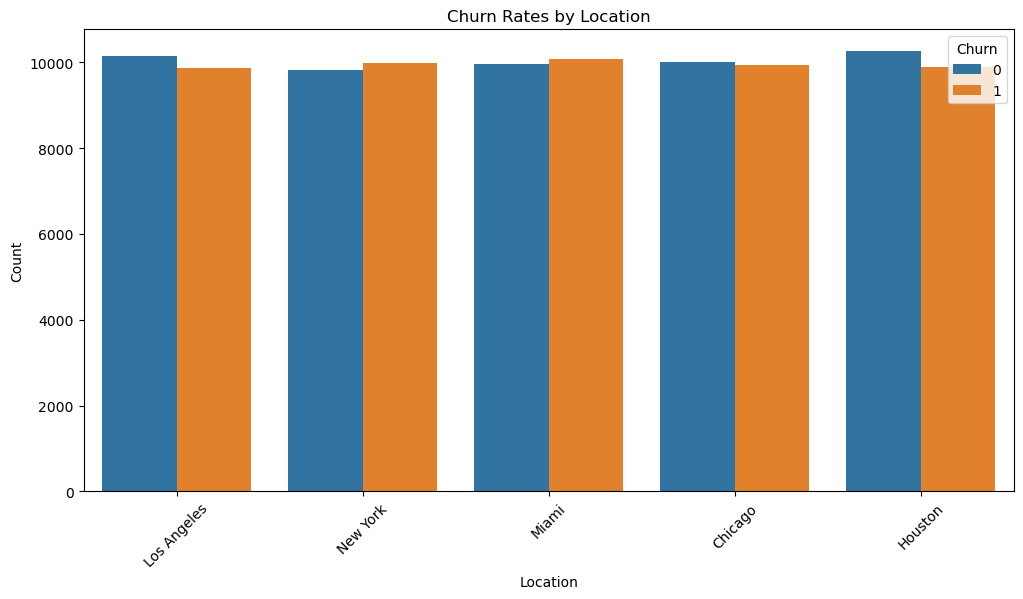

In [30]:
# Create a bar plot to visualize the churn rates based on customer location.

plt.figure(figsize=(12, 6))
sns.countplot(x='Location', hue='Churn', data=customer_record)
plt.title('Churn Rates by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [31]:
#Calculated churn rates for each location.

churn_rates_by_location = customer_record.groupby('Location')['Churn'].mean()
print("Churn Rates by Location:")
print(churn_rates_by_location)


Churn Rates by Location:
Location
Chicago        0.498296
Houston        0.491095
Los Angeles    0.492989
Miami          0.503020
New York       0.503659
Name: Churn, dtype: float64


In [32]:
# determing the differences in churn rates between locations are significant or not.

contingency_table = pd.crosstab(customer_record['Location'], customer_record['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared statistic: 10.404170106364795
P-value: 0.03414293762924668


### Gender vs. Monthly_Bill: Determining if there's a difference in monthly bills between genders or not

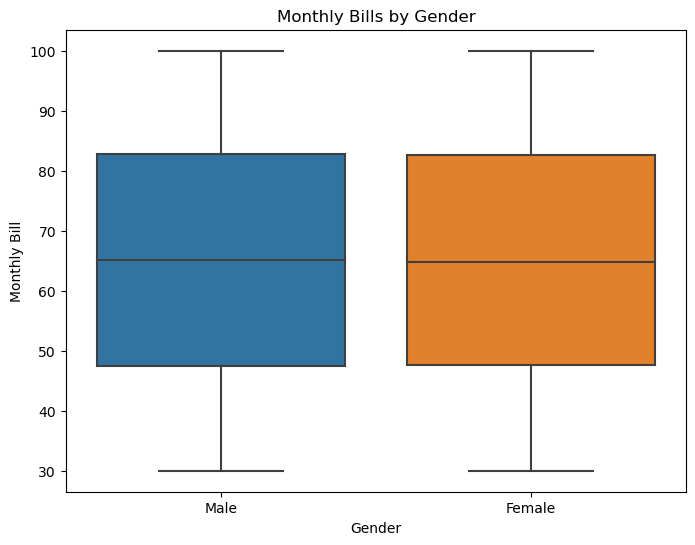

In [33]:
#Created box plots to visualize the distribution of monthly bills by gender.

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Monthly_Bill', data=customer_record)
plt.title('Monthly Bills by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Bill')
plt.show()


In [34]:
## Performed a statistical test, such as the t-test, to determine if there's a significant difference in monthly bills between genders.

from scipy.stats import ttest_ind

male_bills = customer_record[customer_record['Gender'] == 'Male']['Monthly_Bill']
female_bills = customer_record[customer_record['Gender'] == 'Female']['Monthly_Bill']

t_statistic, p_value = ttest_ind(male_bills, female_bills)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 0.7080182100828798
P-value: 0.4789355993067458


### Location vs. Total_Usage_GB: Explore whether location affects total data usage.

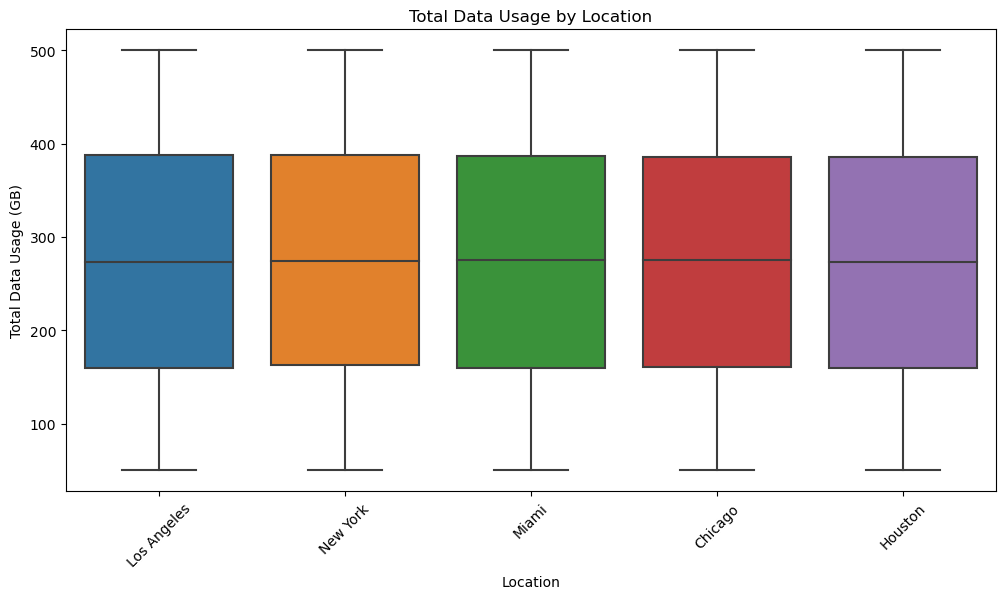

In [35]:
# Created box plots or violin plots to visualize the distribution of total data usage by location.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Total_Usage_GB', data=customer_record)
plt.title('Total Data Usage by Location')
plt.xlabel('Location')
plt.ylabel('Total Data Usage (GB)')
plt.xticks(rotation=45)
plt.show()


In [36]:
## Performed statistical analysis, such as ANOVA (analysis of variance), to determine if there are significant differences in total data usage among different locations or not



locations = customer_record['Location'].unique()

groups = [customer_record[customer_record['Location'] == loc]['Total_Usage_GB'] for loc in locations]
anova_result = stats.f_oneway(*groups)

print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA Results:
F-statistic: 0.3399090014277433
P-value: 0.8511784926216176


### Subscription_Length_Months vs. Churn: Investigating whether longer subscription lengths are associated with lower churn rates.

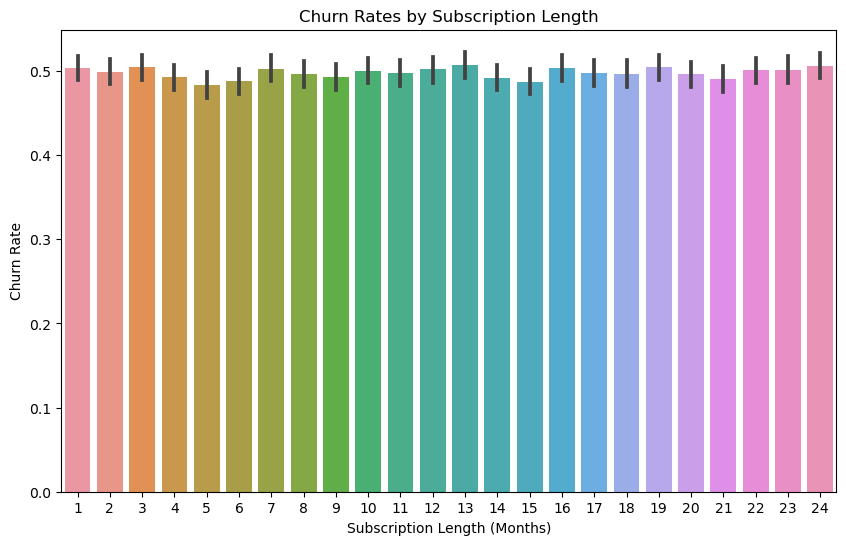

In [37]:
### Created a bar plot to visualize the churn rates based on subscription lengths.

plt.figure(figsize=(10, 6))
sns.barplot(x='Subscription_Length_Months', y='Churn', data=customer_record)
plt.title('Churn Rates by Subscription Length')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Churn Rate')
plt.show()


In [38]:
# Performed additional statistical analysis, such as a correlation test, to determine if there's a significant relationship between subscription length and churn rates.

correlation = customer_record['Subscription_Length_Months'].corr(customer_record['Churn'])
print(f"Correlation between Subscription Length and Churn: {correlation}")


Correlation between Subscription Length and Churn: 0.0023282424024210035


### Age vs. Churn: Analyzing if there's a difference in the average age of customers who churn and those who don't.

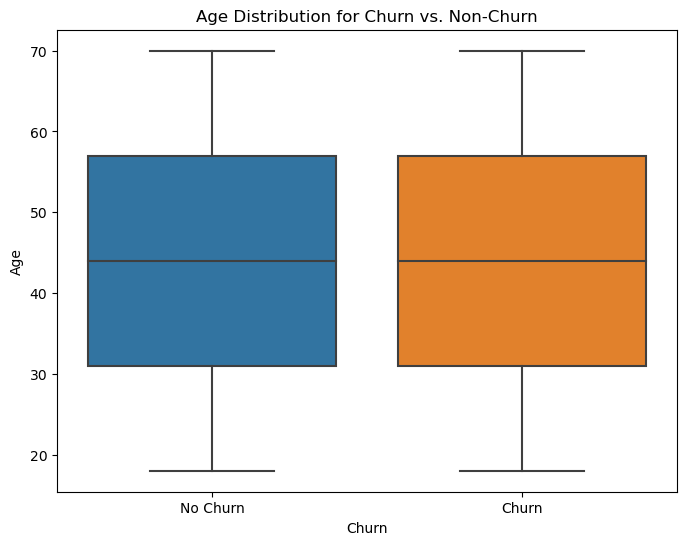

In [39]:
#Created box plots to visualize the distribution of ages for customers who churn and those who don't.

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Age', data=customer_record)
plt.title('Age Distribution for Churn vs. Non-Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


In [40]:
## Performed a statistical test, such as a t-test, to determine if there's a significant difference in the average age between customers who churn and those who don't.


age_churn = customer_record[customer_record['Churn'] == 'Yes']['Age']
age_no_churn = customer_record[customer_record['Churn'] == 'No']['Age']

t_statistic, p_value = ttest_ind(age_churn, age_no_churn)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: nan
P-value: nan


### Gender vs. Churn: Compare churn rates between genders.

In [41]:
# Calculating Churn rates for each gender

churn_rates_by_gender = customer_record.groupby('Gender')['Churn'].mean()
print("Churn Rates by Gender:")
print(churn_rates_by_gender)


Churn Rates by Gender:
Gender
Female    0.496734
Male      0.498855
Name: Churn, dtype: float64


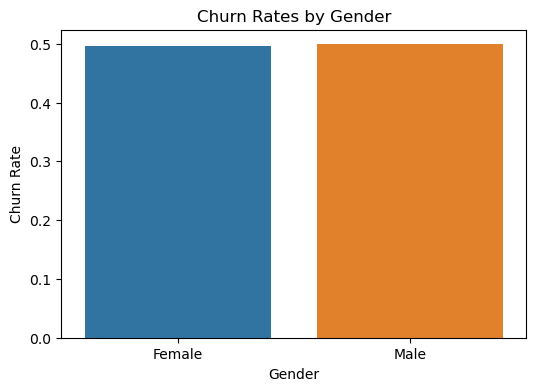

In [42]:
# Created a bar plot to visualize the churn rates between genders.

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rates_by_gender.index, y=churn_rates_by_gender.values)
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


### Subscription_Length_Months and Monthly_Bill interaction: Checking if the effect of subscription length on churn depends on the monthly bill amount.

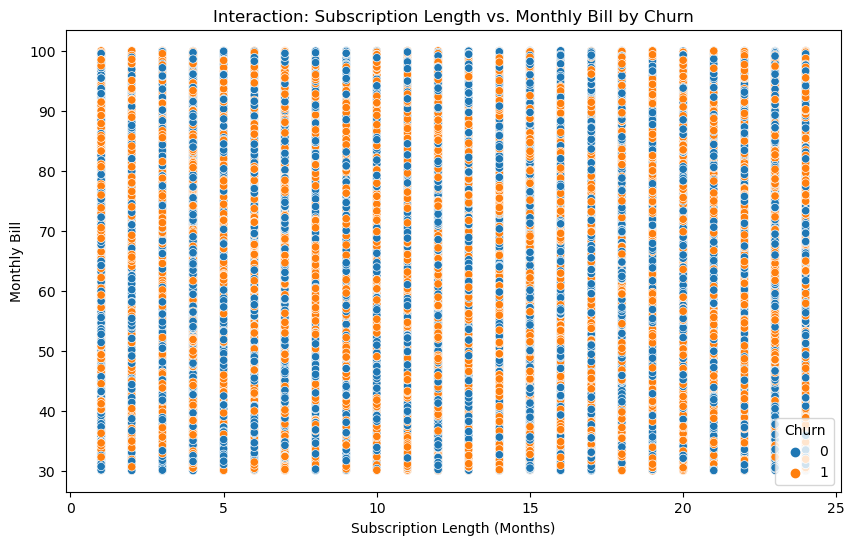

In [43]:
# Created a scatter plot or a heatmap to visualize the interaction between subscription length, monthly bill, and churn.


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscription_Length_Months', y='Monthly_Bill', hue='Churn', data=customer_record)
plt.title('Interaction: Subscription Length vs. Monthly Bill by Churn')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Monthly Bill')
plt.legend(title='Churn')
plt.show()


In [44]:
# performed additional analysis, such as creating a regression model that includes interaction terms between subscription length and monthly bill to predict churn.

import statsmodels.api as sm

customer_record_copy['Interaction'] = customer_record_copy['Subscription_Length_Months'] * customer_record_copy['Monthly_Bill']
X = sm.add_constant(customer_record_copy[['Subscription_Length_Months', 'Monthly_Bill', 'Interaction']])
y = customer_record_copy['Churn']

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.693133
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99996
Method:                           MLE   Df Model:                            3
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:               7.001e-06
Time:                        12:39:02   Log-Likelihood:                -69313.
converged:                       True   LL-Null:                       -69314.
Covariance Type:            nonrobust   LLR p-value:                    0.8084
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0398      0.044     -0.907      0.364      

## 3. Multivariate Analysis

<Figure size 2000x1000 with 0 Axes>

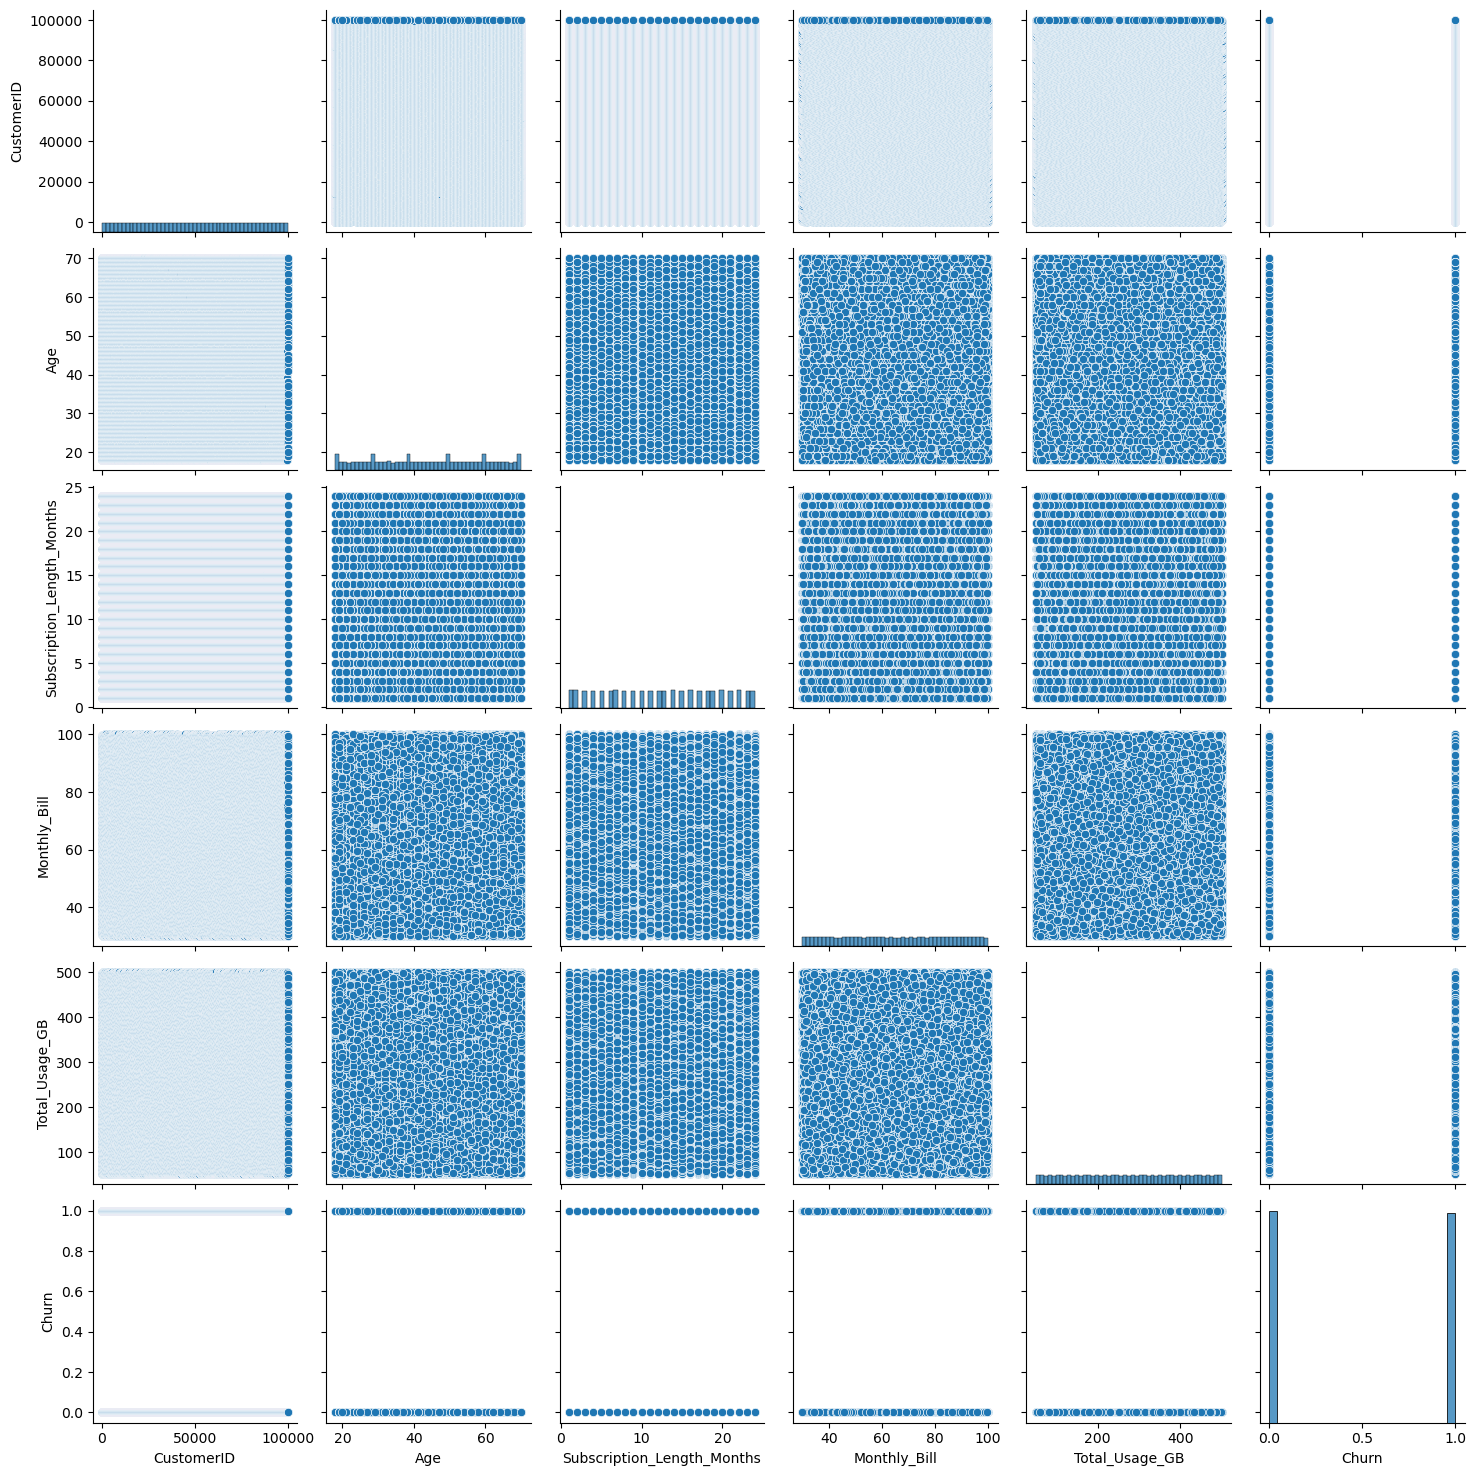

In [45]:
# Analyzing Multivariate 
plt.figure(figsize=(20, 10))
sns.pairplot(customer_record)
plt.show()

### Total_Usage_GB, Monthly_Bill, and Churn: Investigating how total usage and monthly bill together influence churn behavior.

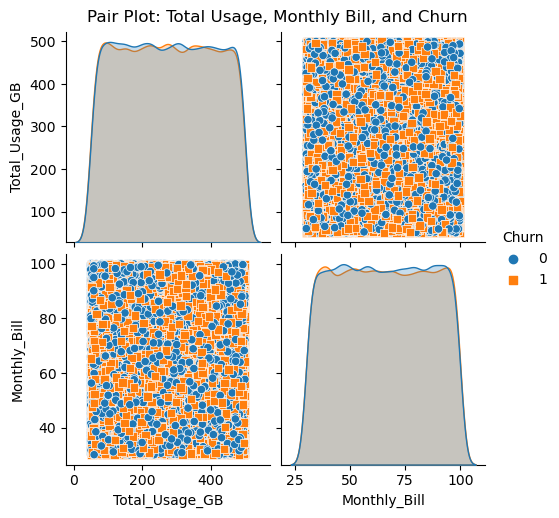

In [46]:
# Created scatter plots or pair plots to visualize the relationships between total usage, monthly bill, and churn.

sns.pairplot(customer_record, hue='Churn', vars=['Total_Usage_GB', 'Monthly_Bill'], markers=['o', 's'])
plt.suptitle('Pair Plot: Total Usage, Monthly Bill, and Churn', y=1.02)
plt.show()


In [47]:
#performed additional analysis, such as creating a logistic regression model to predict churn based on total usage and monthly bill.

import statsmodels.api as sm

X = sm.add_constant(customer_record[['Total_Usage_GB', 'Monthly_Bill']])
y = customer_record['Churn']

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.693133
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99997
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:               5.854e-06
Time:                        12:39:14   Log-Likelihood:                -69313.
converged:                       True   LL-Null:                       -69314.
Covariance Type:            nonrobust   LLR p-value:                    0.6665
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0044      0.025      0.176      0.860      -0.045       0.054
Total_Usage_GB -4

In [48]:
# create lists for categorical and numerical columns
numerical_features = []
categorical_features = []
for i in customer_record.columns:
    if(customer_record[i].nunique() < 10) | (i in (customer_record.describe(include='O').columns)):
        categorical_features.append(i)
    else:
        numerical_features.append(i)

## Data Preprocessing

### A. Checking Null values and Unwanted Columns¶

In [49]:
# Checking for null values
customer_record.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

#### Removing Column which is of no used

In [50]:
# Removing columns which is of no use and also update the df_sales dataframe
customer_record.drop(['CustomerID'],axis=1, inplace=True)
customer_record.drop(['Name'],axis=1, inplace=True)


<h4 style=color:green> Above Column Got removed from df_sales</h4>

In [51]:
# Checking DF_Sales dataframe whether nouse column is removed or not
customer_record.head(10)

Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0   63    Male  Los Angeles                          17         73.36   
1   62  Female     New York                           1         48.76   
2   24  Female  Los Angeles                           5         85.47   
3   36  Female        Miami                           3         97.94   
4   46  Female        Miami                          19         58.14   
5   67    Male     New York                          15         82.65   
6   30  Female      Chicago                           3         73.79   
7   67  Female        Miami                           1         97.70   
8   20  Female        Miami                          10         42.45   
9   53  Female  Los Angeles                          12         64.49   

   Total_Usage_GB  Churn  
0             236      0  
1             172      0  
2             460      0  
3             297      1  
4             266      0  
5             456      1  
6             269      0  
7             396      1  
8             150      1  
9             383      1

### B. Imputing Missing Values in the Column

### C. Checking Duplicate Row

In [52]:
#Checking how many total number of rows are duplicated
customer_record.duplicated().sum()

0

### D.Conversion of Categorical Data into Numerical

In [53]:
# Get all categorical feature list
list(customer_record.select_dtypes('object'))

['Gender', 'Location']

Technique Used:

1.Manual Encoding: Manual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

2.Frequency Encoding: Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

#### 1.Gender:

In [54]:
# Get value counts of gender
customer_record.Gender.value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [55]:
# Use mannual encoding to map the labels
customer_record.Gender = customer_record.Gender.map({'Male':1,'Female':0})

In [56]:
# Checking conversion happen or not
customer_record.Gender.value_counts()

0    50216
1    49784
Name: Gender, dtype: int64

#### 2.Location:

In [57]:
# Get the value counts of employee department 
customer_record.Location.value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [58]:
# Use Frequency encoding
customer_record.loc[customer_record['Location']=='Houston','Location']=4
customer_record.loc[customer_record['Location']=='Los Angeles','Location']=3
customer_record.loc[customer_record['Location']=='Miami','Location']=2
customer_record.loc[customer_record['Location']=='Chicago','Location']=1
customer_record.loc[customer_record['Location']=='New York','Location']=0

In [59]:
# Check conversion happen or not
customer_record.Location.value_counts()

4    20157
3    20041
2    20031
1    19958
0    19813
Name: Location, dtype: int64

### E. Checking for Outliers And Impute Outliers

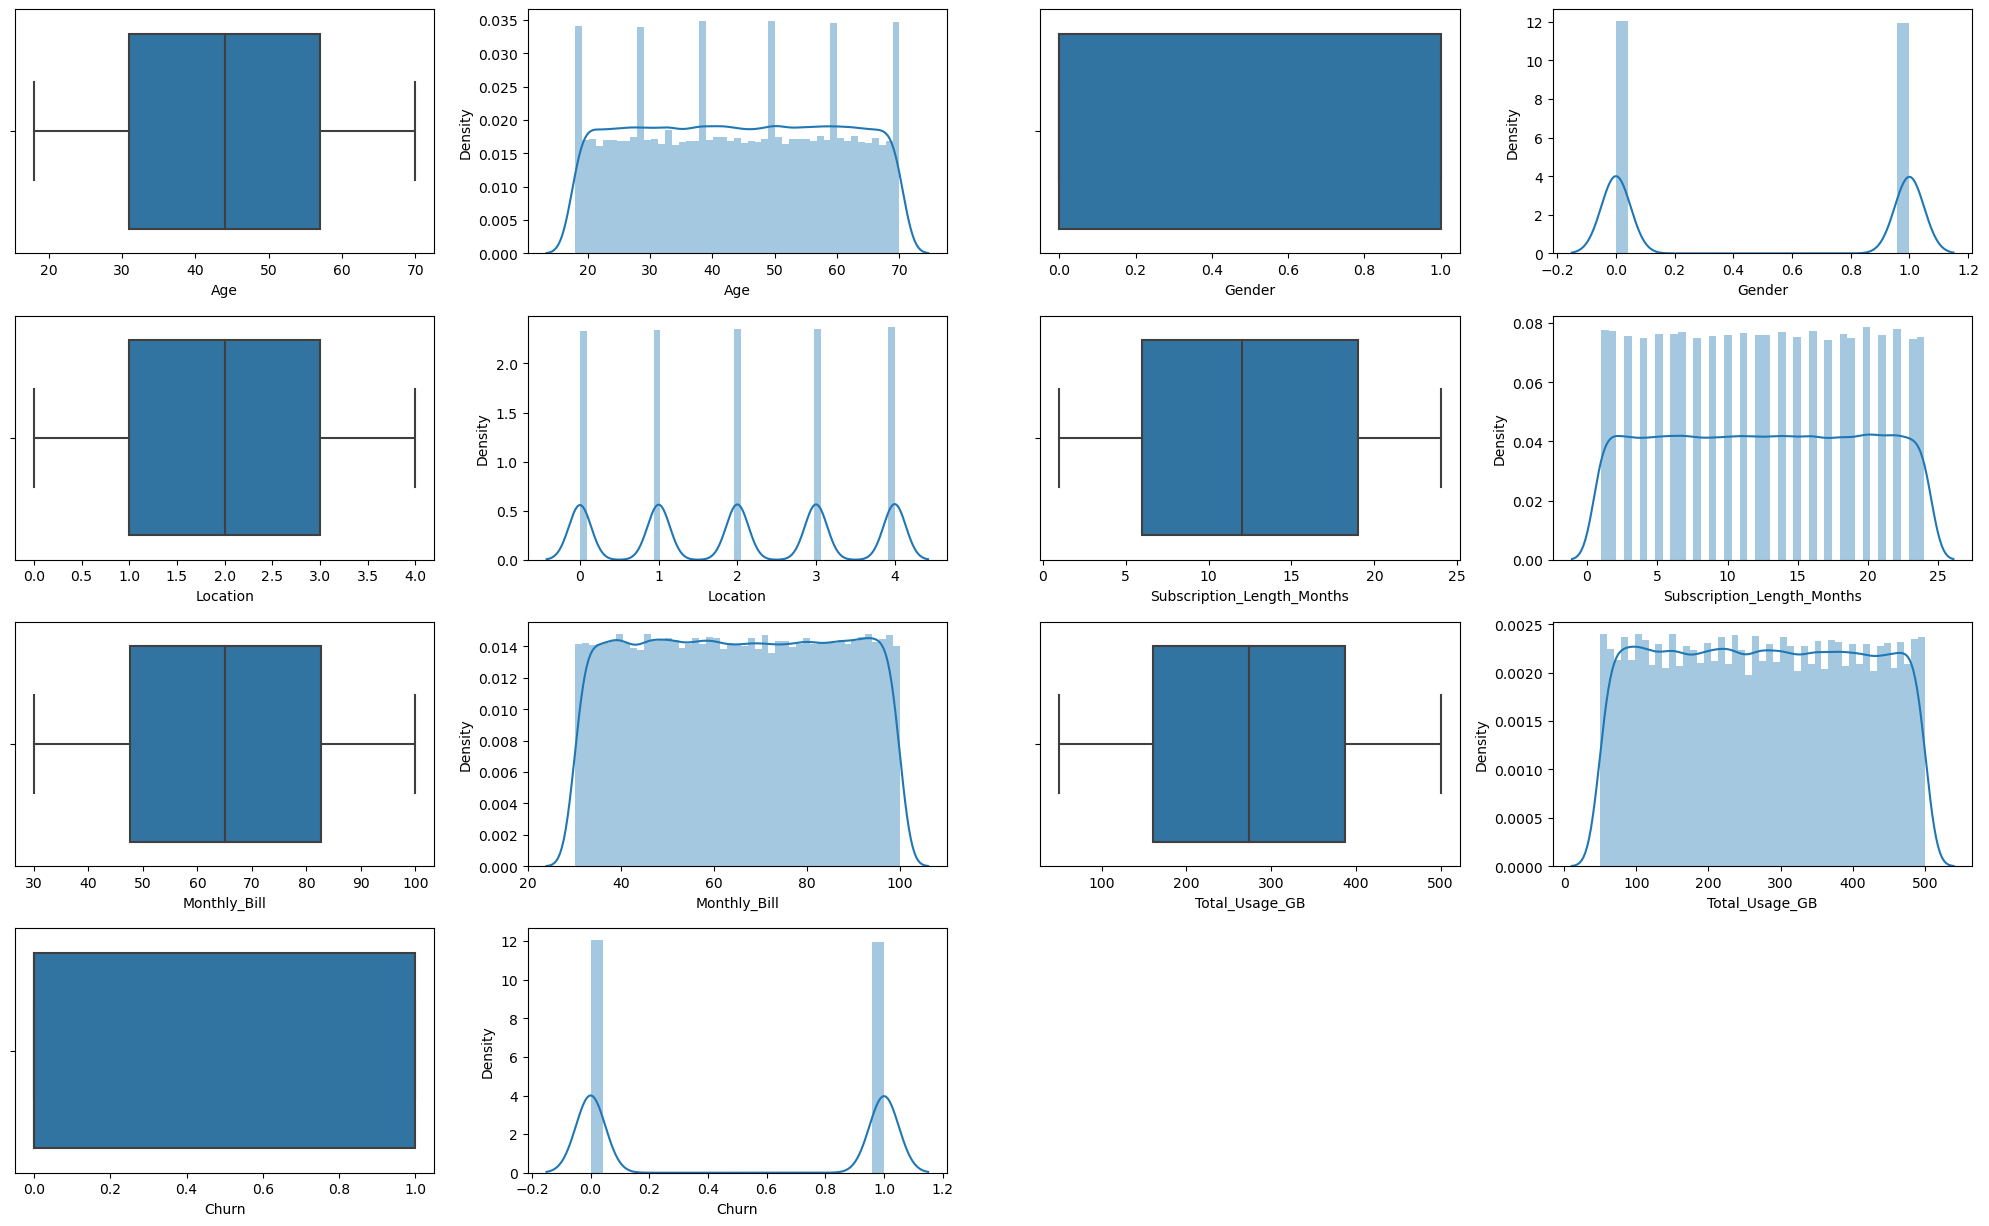

In [60]:
# Checking the outliers for numerical columns
plt.figure(figsize=(20,15))
plotnumber = 1
for column in customer_record:
    ax = plt.subplot(5,4,plotnumber)
    sns.boxplot(customer_record[column])
    plotnumber += 1
    ax = plt.subplot(5,4,plotnumber)
    sns.distplot(customer_record[column])
    plotnumber += 1
plt.tight_layout()

## Feature Selection

###  A. Checking For Correlation

[]

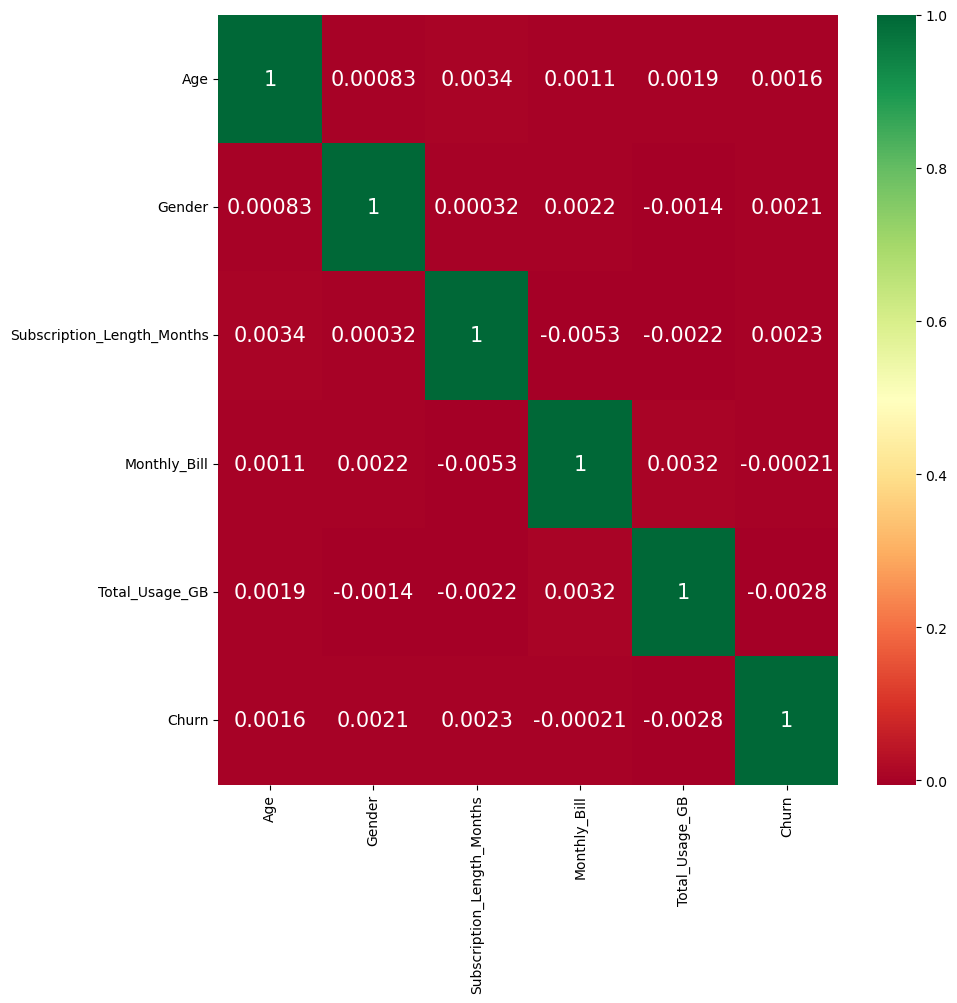

In [61]:
# plotting heatmap to check correlation 
plt.figure(figsize = (10,10))
sns.heatmap(customer_record.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.plot()

<h4 style=color:green>No correlated features are present</h4>

## Model Creation

#### Preparing Training and testing data

In [62]:
## Defining X and y 
X = customer_record.drop(columns = ['Churn']) 
y = customer_record['Churn'] ##  target variable or the variable which we have to predict

<h4 style=color:green> Training and testing data defined above</h4>

In [63]:
#printing x value
print(X)

       Age  Gender Location  Subscription_Length_Months  Monthly_Bill  \
0       63       1        3                          17         73.36   
1       62       0        0                           1         48.76   
2       24       0        3                           5         85.47   
3       36       0        2                           3         97.94   
4       46       0        2                          19         58.14   
...    ...     ...      ...                         ...           ...   
99995   33       1        4                          23         55.13   
99996   62       0        0                          19         61.65   
99997   64       1        1                          17         96.11   
99998   51       0        0                          20         49.25   
99999   27       0        3                          19         76.57   

       Total_Usage_GB  
0                 236  
1                 172  
2                 460  
3                 297  
4  

In [64]:
# Printing y value
print(y)

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


In [65]:
#Creating a variable for random_state
ran_state=42

In [66]:
## Scaling the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print(X_scaled)

[[ 1.24167039  1.00432937  0.70187777  0.65111499  0.41060598 -0.29428898]
 [ 1.17622625 -0.99568929 -1.42011612 -1.65887854 -0.80537409 -0.78485174]
 [-1.31065114 -0.99568929  0.70187777 -1.08138015  1.0092043   1.42268068]
 ...
 [ 1.30711454  1.00432937 -0.71278482  0.65111499  1.5351404  -0.17931334]
 [ 0.45634069 -0.99568929 -1.42011612  1.08423877 -0.78115335  1.22338955]
 [-1.11431871 -0.99568929  0.70187777  0.93986418  0.56927655 -0.7771867 ]]


In [67]:
#setting up training and testing data
x_train , x_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.23, random_state= ran_state )

### Testing The Model

In [68]:
#  Creating a Dictionary to put a model at one place
list_of_model={ "Logistic Regression": LogisticRegression(),
           "Support Vector Machine":SVC(),
           "K-Nearest Neighbors":KNeighborsClassifier(),
           "Random Forest":RandomForestClassifier(),
           "Decision Tree Classifier":DecisionTreeClassifier(),
           "Gradient Boost Classifier":GradientBoostingClassifier(),
           "XG Boost Classifier":XGBClassifier(),
           "AdaBoost Classifier":AdaBoostClassifier(),
            "MLP Classifier":MLPClassifier()
           }

In [69]:
# Creating a function to train the model with train data and return model score for target Variable
def fit_score(list_of_model, x_train, x_test, y_train, y_test):
    np.random.seed(ran_state) #Setting random seeds
    score_of_model={} # Dictionary to store model score
    for name, model in list_of_model.items(): #Loop
        model.fit(x_train,y_train) #fitting the model to data
        score_of_model[name]=model.score(x_test,y_test) #Evaluating and Appending its score
    return score_of_model

In [70]:
#calling Score for Status(1st Traget) and printing
Status_model_score=fit_score(list_of_model=list_of_model, x_train=x_train, x_test=x_test, y_train = y_train, y_test = y_test)
Status_model_score

{'Logistic Regression': 0.49978260869565216,
 'Support Vector Machine': 0.4981304347826087,
 'K-Nearest Neighbors': 0.49778260869565216,
 'Random Forest': 0.4963913043478261,
 'Decision Tree Classifier': 0.5053043478260869,
 'Gradient Boost Classifier': 0.5016086956521739,
 'XG Boost Classifier': 0.5031304347826087,
 'AdaBoost Classifier': 0.5024782608695653,
 'MLP Classifier': 0.4979130434782609}

<AxesSubplot:>

<Figure size 1000x1000 with 0 Axes>

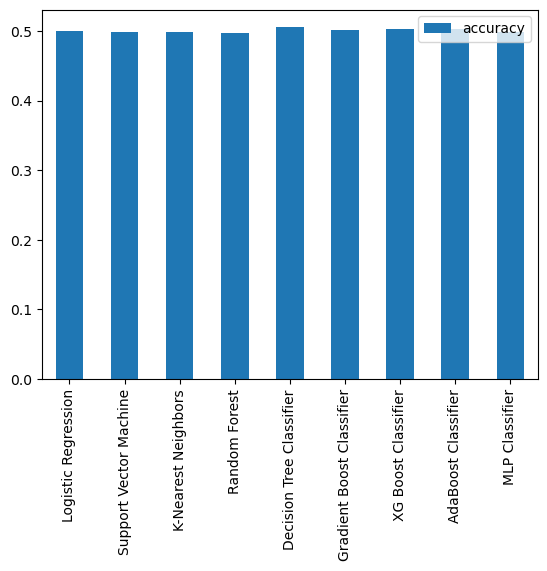

In [71]:
#Plotting the score of various in the graph if target variable (Status)
plt.figure(figsize = (10,10))
cmp= pd.DataFrame(Status_model_score, index=["accuracy"])
cmp.T.plot.bar()

### Predict y_train

In [72]:
# Creating a function to predict y_train
def y_predict_train_value(list_of_model, x_train):
    value_of_predict={} # Dictionary to store value of predict
    for name, model in list_of_model.items(): #Loop 
        value_of_predict[name]=model.predict(x_train) #Evaluating and Appending its value
    return value_of_predict

In [73]:
# predicting y_train
y_train_pred = y_predict_train_value(list_of_model, x_train)
y_train_pred

{'Logistic Regression': array([1, 1, 1, ..., 0, 1, 0], dtype=int64),
 'Support Vector Machine': array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 'K-Nearest Neighbors': array([1, 0, 1, ..., 0, 1, 0], dtype=int64),
 'Random Forest': array([1, 0, 1, ..., 1, 1, 0], dtype=int64),
 'Decision Tree Classifier': array([1, 0, 1, ..., 1, 1, 0], dtype=int64),
 'Gradient Boost Classifier': array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 'XG Boost Classifier': array([1, 1, 0, ..., 1, 1, 1]),
 'AdaBoost Classifier': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'MLP Classifier': array([0, 0, 0, ..., 1, 0, 1], dtype=int64)}

**lets see how well our model performs on test data set**

### Predict y_Test

In [74]:
# Creating a function to predict y_test
def y_predict_test_value(list_of_model, x_test):
    value_of_predict_test={} # Dictionary to store value of predict
    for name, model in list_of_model.items(): #Loop 
        value_of_predict_test[name]=model.predict(x_test) #Evaluating and Appending its value
    return value_of_predict_test

In [75]:
# predicting y_test 
y_test_pred = y_predict_test_value(list_of_model, x_test)
y_test_pred

{'Logistic Regression': array([0, 1, 0, ..., 0, 1, 1], dtype=int64),
 'Support Vector Machine': array([0, 1, 0, ..., 0, 1, 0], dtype=int64),
 'K-Nearest Neighbors': array([1, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Random Forest': array([1, 1, 0, ..., 1, 1, 0], dtype=int64),
 'Decision Tree Classifier': array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 'Gradient Boost Classifier': array([0, 1, 0, ..., 0, 1, 1], dtype=int64),
 'XG Boost Classifier': array([0, 0, 0, ..., 1, 1, 1]),
 'AdaBoost Classifier': array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 'MLP Classifier': array([0, 1, 0, ..., 0, 1, 0], dtype=int64)}

## Logistic Regression Score

Logistic Regression Score are as follows:
Accuracy Score :
 0.49978260869565216
Recall Score :
 0.38502063394503466
Precison Score :
 0.4934728786855728
F1 Score :
 0.43255240443896426
roc_auc_score:
 0.4986854956823614
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.61      0.55     11611
           1       0.49      0.39      0.43     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.49     23000
weighted avg       0.50      0.50      0.49     23000

Confusion Matrix  :


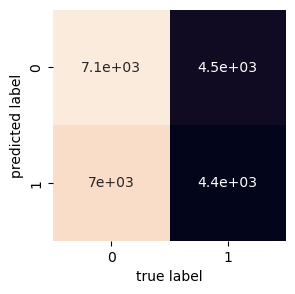

In [76]:
print("Logistic Regression Score are as follows:")
print("=========================================")
LR_accuracy=accuracy_score(y_test,y_test_pred["Logistic Regression"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',LR_accuracy) # printing accuracy score

print("=========================================")
LR_recall=recall_score(y_test,y_test_pred["Logistic Regression"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',LR_recall) # #printing recall score
print("=========================================")

LR_precision=precision_score(y_test,y_test_pred["Logistic Regression"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',LR_precision) # printing precision score

print("=========================================")
LR_f1score=f1_score(y_test,y_test_pred["Logistic Regression"])# checking F1_Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',LR_f1score) # printing F1_score

print("=========================================")
LR_roc_auc_score=roc_auc_score(y_test,y_test_pred["Logistic Regression"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',LR_roc_auc_score) # printing roc_auc_score


print("=========================================")
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["Logistic Regression"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m' )
y=y_test_pred["Logistic Regression"]
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["Logistic Regression"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["Logistic Regression"])


<h3 style=color:green> We can see that the Precison and F1 Score for predicting 1 cases is less than 70%</h3>

## Support Vector Machine Score

Support Vector Machine Score are as follows:
Accuracy Score :
 0.4981304347826087
Recall Score :
 0.3822109052594609
Precison Score :
 0.49130925507900675
F1_Score :
 0.4299471578843399
roc_auc_score:
 0.4970222556613384
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.61      0.55     11611
           1       0.49      0.38      0.43     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.49     23000
weighted avg       0.50      0.50      0.49     23000

Confusion Matrix  :


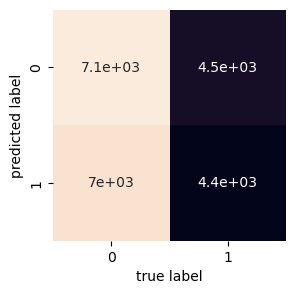

In [77]:
print("Support Vector Machine Score are as follows:")
print("=========================================")
SVM_accuracy=accuracy_score(y_test,y_test_pred["Support Vector Machine"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',SVM_accuracy) # printing accuracy score

print("=========================================")
SVM_recall=recall_score(y_test,y_test_pred["Support Vector Machine"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',SVM_recall) # #printing recall score
print("=========================================")

SVM_precision=precision_score(y_test,y_test_pred["Support Vector Machine"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',SVM_precision) # printing precision score
print("=========================================")

SVM_f1score=f1_score(y_test,y_test_pred["Support Vector Machine"])# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',SVM_f1score) # printing F1_score
print("=========================================")


SVM_roc_auc_score=roc_auc_score(y_test,y_test_pred["Support Vector Machine"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',SVM_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["Support Vector Machine"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
y=y_test_pred["Support Vector Machine"]
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["Support Vector Machine"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["Support Vector Machine"])

<h3 style=color:green> We can see that the score through Support vector machine model is also not good f1 and precision socre is less than 50% of target variable </h3>

## K-Nearest Neighbors Score

K Neighbors Classifier Score are as follows:
Accuracy Score :
 0.49778260869565216
Recall Score :
 0.4943366406181403
Precison Score :
 0.49290842234284715
F1_Score  :
 0.4936214983998948
roc_auc_score:
 0.4977496655851016
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     11611
           1       0.49      0.49      0.49     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.50     23000
weighted avg       0.50      0.50      0.50     23000

Confusion Matrix  :


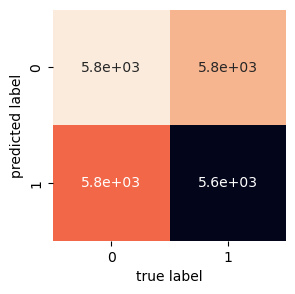

In [78]:
print("K Neighbors Classifier Score are as follows:")
print("=========================================")
KN_accuracy=accuracy_score(y_test,y_test_pred["K-Nearest Neighbors"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',KN_accuracy) # printing accuracy score

print("=========================================")
KN_recall=recall_score(y_test,y_test_pred["K-Nearest Neighbors"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',KN_recall) # #printing recall score
print("=========================================")

KN_precision=precision_score(y_test,y_test_pred["K-Nearest Neighbors"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',KN_precision) # printing precision score
print("=========================================")

KN_f1score=f1_score(y_test,y_test_pred["K-Nearest Neighbors"])# checking F1_Score
print('\033[1m' + 'F1_Score  :' + '\033[0m' + '\n',KN_f1score) # printing F1_score
print("=========================================")

KN_roc_auc_score=roc_auc_score(y_test,y_test_pred["K-Nearest Neighbors"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',KN_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["K-Nearest Neighbors"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
y=y_test_pred["K-Nearest Neighbors"]
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["K-Nearest Neighbors"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["K-Nearest Neighbors"])

<h3 style=color:green>We can See that overall score is less than 70 %</h3>

## Random Forest Score

Random Forest Classifier Score are as follows:
Accuracy Score :
 0.4963913043478261
Recall Score :
 0.4695759065765212
Precison Score :
 0.49109274563820016
F1_Score :
 0.4800933614614659
roc_auc_score:
 0.4977496655851016
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     11611
           1       0.49      0.47      0.48     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.50     23000
weighted avg       0.50      0.50      0.50     23000

Confusion Matrix  :


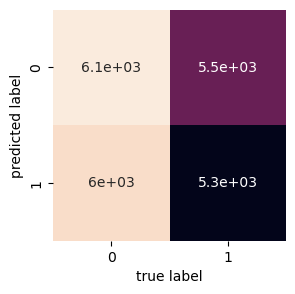

In [79]:
print("Random Forest Classifier Score are as follows:")
print("=========================================")
RFC_accuracy=accuracy_score(y_test,y_test_pred["Random Forest"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',RFC_accuracy) # printing accuracy score

print("=========================================")
RFC_recall=recall_score(y_test,y_test_pred["Random Forest"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',RFC_recall) # #printing recall score
print("=========================================")

RFC_precision=precision_score(y_test,y_test_pred["Random Forest"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',RFC_precision) # printing precision score
print("=========================================")

RFC_f1score=f1_score(y_test,y_test_pred["Random Forest"])# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',RFC_f1score) # printing F1_score
print("=========================================")

RFC_roc_auc_score=roc_auc_score(y_test,y_test_pred["Random Forest"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',KN_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["Random Forest"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
y=y_test_pred["Random Forest"]
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["Random Forest"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["Random Forest"])

<h3 style=color:green>We can See that overall score is less than 70 %</h3>

### Decision Tree Classifier Score


Decision Tree Classifier Score are as follows:
Accuracy Score :
 0.5053043478260869
Recall Score :
 0.5038194749319519
Precison Score :
 0.5004797208896642
F1_Score :
 0.5021440448061609
roc_auc_score:
 0.5052901525895657
Classification Report  :
               precision    recall  f1-score   support

           0       0.51      0.51      0.51     11611
           1       0.50      0.50      0.50     11389

    accuracy                           0.51     23000
   macro avg       0.51      0.51      0.51     23000
weighted avg       0.51      0.51      0.51     23000

Confusion Matrix  :


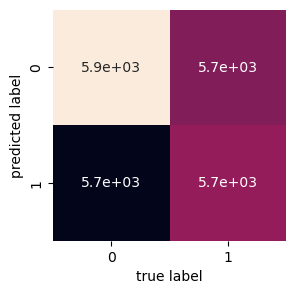

In [80]:
print("Decision Tree Classifier Score are as follows:")
print("=========================================")
DTC_accuracy=accuracy_score(y_test,y_test_pred["Decision Tree Classifier"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',DTC_accuracy) # printing accuracy score

print("=========================================")
DTC_recall=recall_score(y_test,y_test_pred["Decision Tree Classifier"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',DTC_recall) # #printing recall score
print("=========================================")

DTC_precision=precision_score(y_test,y_test_pred["Decision Tree Classifier"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',DTC_precision) # printing precision score
print("=========================================")

DTC_f1score=f1_score(y_test,y_test_pred["Decision Tree Classifier"])# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',DTC_f1score) # printing F1_Score
print("=========================================")

DTC_roc_auc_score=roc_auc_score(y_test,y_test_pred["Decision Tree Classifier"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',DTC_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["Decision Tree Classifier"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
y=y_test_pred["Decision Tree Classifier"]
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["Decision Tree Classifier"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["Decision Tree Classifier"])

## Gradient Boost Classifier Score


Gradient Boosting Classifierr Score are as follows:
Accuracy Score :
 0.5016086956521739
Recall Score :
 0.45236631837738167
Precison Score :
 0.4964347658508383
F1_Score :
 0.473377130518675
roc_auc_score:
 0.5011379434449995
Classification Report  :
               precision    recall  f1-score   support

           0       0.51      0.55      0.53     11611
           1       0.50      0.45      0.47     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.50     23000
weighted avg       0.50      0.50      0.50     23000

Confusion Matrix  :


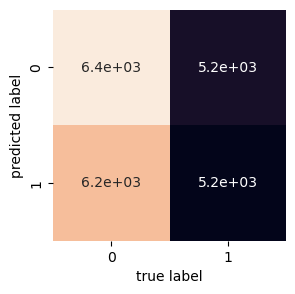

In [81]:
print("Gradient Boosting Classifierr Score are as follows:")
print("=========================================")
GB_accuracy=accuracy_score(y_test,y_test_pred["Gradient Boost Classifier"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',GB_accuracy) # printing accuracy score

print("=========================================")
GB_recall=recall_score(y_test,y_test_pred["Gradient Boost Classifier"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',GB_recall) # #printing recall score
print("=========================================")

GB_precision=precision_score(y_test,y_test_pred["Gradient Boost Classifier"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',GB_precision) # printing precision score
print("=========================================")

GB_f1score=f1_score(y_test,y_test_pred["Gradient Boost Classifier"])# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',GB_f1score) # printing F1_score
print("=========================================")

GB_roc_auc_score=roc_auc_score(y_test,y_test_pred["Gradient Boost Classifier"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',GB_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["Gradient Boost Classifier"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
y=y_test_pred["Gradient Boost Classifier"]
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["Gradient Boost Classifier"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["Gradient Boost Classifier"])

<h3 style=color:green>We can See that overall score is less than 70 %</h3>

### XG Boost Classifier

XG Boost Classifier Score are as follows:
Accuracy Score :
 0.5031304347826087
Recall Score :
 0.48898059531126525
Precison Score :
 0.4982553457994095
F1_Score :
 0.49357440397057517
roc_auc_score:
 0.5029951637309061
Classification Report  :
               precision    recall  f1-score   support

           0       0.51      0.52      0.51     11611
           1       0.50      0.49      0.49     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.50     23000
weighted avg       0.50      0.50      0.50     23000

Confusion Matrix  :


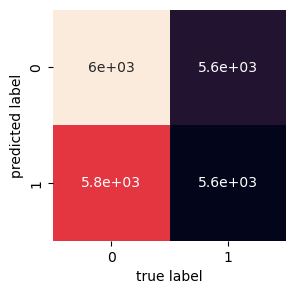

In [82]:
print("XG Boost Classifier Score are as follows:")
print("=========================================")
XG_accuracy=accuracy_score(y_test,y_test_pred["XG Boost Classifier"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',XG_accuracy) # printing accuracy score

print("=========================================")
XG_recall=recall_score(y_test,y_test_pred["XG Boost Classifier"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',XG_recall) # #printing recall score
print("=========================================")

XG_precision=precision_score(y_test,y_test_pred["XG Boost Classifier"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',XG_precision) # printing precision score
print("=========================================")

XG_f1score=f1_score(y_test,y_test_pred["XG Boost Classifier"])# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',XG_f1score) # printing F1_score
print("=========================================")

XG_roc_auc_score=roc_auc_score(y_test,y_test_pred["XG Boost Classifier"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',XG_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["XG Boost Classifier"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
y=y_test_pred["XG Boost Classifier"]
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["XG Boost Classifier"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["XG Boost Classifier"])


<h3 style=color:green>We can See that overall score is less than 70 %</h3>

## AdaBoost Classifier

AdaBoost Classifier Score are as follows:
Accuracy Score :
 0.5024782608695653
Recall Score :
 0.42637632803582404
Precison Score :
 0.4972353061642433
F1_Score :
 0.4590876861262113
roc_auc_score:
 0.5017507339946583
Classification Report  :
               precision    recall  f1-score   support

           0       0.51      0.58      0.54     11611
           1       0.50      0.43      0.46     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.50     23000
weighted avg       0.50      0.50      0.50     23000

Confusion Matrix  :


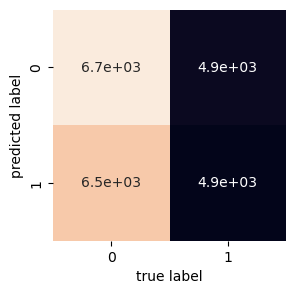

In [83]:
print("AdaBoost Classifier Score are as follows:")
print("=========================================")
ABC_accuracy=accuracy_score(y_test,y_test_pred["AdaBoost Classifier"])#checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ABC_accuracy) # printing accuracy score

print("=========================================")
ABC_recall=recall_score(y_test,y_test_pred["AdaBoost Classifier"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ABC_recall) # #printing recall score
print("=========================================")

ABC_precision=precision_score(y_test,y_test_pred["AdaBoost Classifier"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ABC_precision) # printing precision score
print("=========================================")

ABC_f1score=f1_score(y_test,y_test_pred["AdaBoost Classifier"])# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ABC_f1score) # printing F1_score
print("=========================================")
                            
ABC_roc_auc_score=roc_auc_score(y_test,y_test_pred["AdaBoost Classifier"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',ABC_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["AdaBoost Classifier"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
y=y_test_pred["AdaBoost Classifier"]
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["AdaBoost Classifier"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["AdaBoost Classifier"])

<h3 style=color:green>We can See that overall score is less than 70 %</h3>

## MLP Classifier Score

MLP Classifier Score are as follows:
Accuracy Score :
 0.4979130434782609
Recall Score :
 0.4610589164983756
Precison Score :
 0.49254291342275586
F1_Score :
 0.47628117913832196
roc_auc_score:
 0.4975607217062544
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     11611
           1       0.49      0.46      0.48     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.50     23000
weighted avg       0.50      0.50      0.50     23000

Confusion Matrix  :


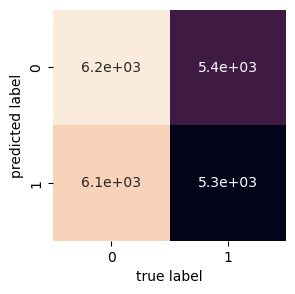

In [84]:
print("MLP Classifier Score are as follows:")
print("=========================================")
ML_accuracy=accuracy_score(y_test,y_test_pred["MLP Classifier"]) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ML_accuracy) # printing accuracy score

print("=========================================")
ML_recall=recall_score(y_test,y_test_pred["MLP Classifier"]) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ML_recall) # #printing recall score
print("=========================================")

ML_precision=precision_score(y_test,y_test_pred["MLP Classifier"])# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ML_precision) # printing precision score
print("=========================================")

ML_f1score=f1_score(y_test,y_test_pred["MLP Classifier"])# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ML_f1score) # printing F1_score

print("=========================================")

ML_roc_auc_score=roc_auc_score(y_test,y_test_pred["MLP Classifier"])# checking roc_auc_score
print('\033[1m' + 'roc_auc_score:' + '\033[0m' + '\n',ML_roc_auc_score) # printing roc_auc_score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_test_pred["MLP Classifier"])) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')

y=y_test_pred["AdaBoost Classifier"]
def plot_conf_mat(y_test,y):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_test_pred["MLP Classifier"]),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_test_pred["MLP Classifier"])

In [85]:
models_list = ['Logistic Regression','Support Vector Machine','K-Nearest Neighbors','Random Forest','Decision Tree Classifier','Gradient Boost Classifier','XG Boost Classifier','AdaBoost Classifier',"MLP Classifier"]
#Creating accuracy_report variable to store accuracy of all the model
accuracy_report=[LR_accuracy,SVM_accuracy,KN_accuracy,RFC_accuracy,DTC_accuracy,GB_accuracy,XG_accuracy,ABC_accuracy,ML_accuracy]

#Creating recall_report variable to store recall of all the model
recall_report=[LR_recall,SVM_recall,KN_recall,RFC_recall,DTC_recall,GB_recall,XG_recall,ABC_recall,ML_recall]

#Creating precision_report variable to store precision of all the model
precision_report=[LR_precision,SVM_precision,KN_precision,RFC_precision,DTC_precision,GB_precision,XG_precision,ABC_precision,ML_precision]

#Creating F1_Score_report variable to store F1_Score of all the model
F1_Score_report=[LR_f1score,SVM_f1score,KN_f1score,RFC_f1score,DTC_f1score,GB_f1score,XG_f1score,ABC_f1score,ML_f1score]

# Creating roc_auc_score report variable to store roc_auc_score of all the model
Roc_Auc_report=[LR_roc_auc_score,SVM_roc_auc_score,KN_roc_auc_score,RFC_roc_auc_score,DTC_roc_auc_score,GB_roc_auc_score,XG_roc_auc_score,ABC_roc_auc_score,ML_roc_auc_score]

# Creating model_report dataframe 
model_report = pd.DataFrame([models_list,accuracy_report,recall_report,precision_report,F1_Score_report,Roc_Auc_report]).T

#Creating column for model report
model_report.columns = ["Model","Accuracy_Score","Recall_Score","Precision_Score","F1_Score","Roc_Auc_score"]

#Sorting value according to Accuracy_score
model_report.sort_values("Accuracy_Score",ascending=False).reset_index(drop=True)

Model Accuracy_Score Recall_Score Precision_Score  \
0   Decision Tree Classifier       0.505304     0.503819         0.50048   
1        XG Boost Classifier        0.50313     0.488981        0.498255   
2        AdaBoost Classifier       0.502478     0.426376        0.497235   
3  Gradient Boost Classifier       0.501609     0.452366        0.496435   
4        Logistic Regression       0.499783     0.385021        0.493473   
5     Support Vector Machine        0.49813     0.382211        0.491309   
6             MLP Classifier       0.497913     0.461059        0.492543   
7        K-Nearest Neighbors       0.497783     0.494337        0.492908   
8              Random Forest       0.496391     0.469576        0.491093   

   F1_Score Roc_Auc_score  
0  0.502144       0.50529  
1  0.493574      0.502995  
2  0.459088      0.501751  
3  0.473377      0.501138  
4  0.432552      0.498685  
5  0.429947      0.497022  
6  0.476281      0.497561  
7  0.493621       0.49775  
8  0.480093      0.496135

<h3 style=color:green>We can see that Decision Tree Classifier  Model is giving highest accuracy in all the model but it is also not good.. so lets do Hypertunning the model</h3>

### Decision Tree Classifier  (Hyper Tunning)

In [86]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Define the search strategy
DTC = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)

# Fit the model to the data
DTC.fit(x_train, y_train)

# Print the best hyperparameters
print(DTC.best_params_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [87]:
## Printing predicit value
y_preds_DTC=DTC.predict(x_test)
print(y_preds_DTC)

[0 1 1 ... 0 0 0]


Decision Tree Classifier Score are as follows:
Accuracy Score :
 0.5020869565217392
Recall Score :
 0.12371586618667135
Precison Score :
 0.4890662964248525
F1 Score :
 0.19747722494744221
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.87      0.64     11611
           1       0.49      0.12      0.20     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.42     23000
weighted avg       0.50      0.50      0.42     23000

Confusion Matrix  :


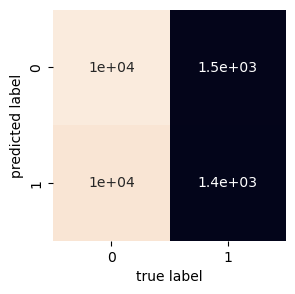

In [88]:
print("Decision Tree Classifier Score are as follows:")
print("=========================================")
DTC_accuracy1=accuracy_score(y_test,y_preds_DTC) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',DTC_accuracy1) # printing accuracy score

print("=========================================")
DTC_recall1=recall_score(y_test,y_preds_DTC) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',DTC_recall1) # #printing recall score
print("=========================================")

DTC_precision1=precision_score(y_test,y_preds_DTC)# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',DTC_precision1) # printing precision score
print("=========================================")

DTC_f1score1=f1_score(y_test,y_preds_DTC)# checking F1 score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',DTC_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_preds_DTC)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y_preds_DTCy_preds_DTC):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds_DTC),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds_DTC)

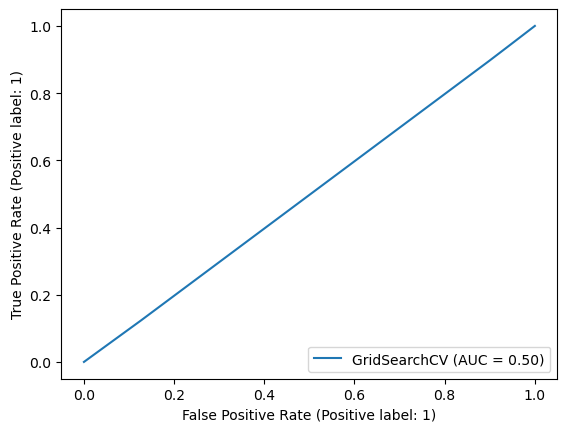

In [89]:
# Plot ROC curve and calculate and AUC metric 
plot_roc_curve(DTC, x_test, y_test)

### Hyper Tunning Randomized SearchCV by Logistic Regression for both Target Variable

In [90]:
#Defining parameter Range
log_reg_grid = {"C":np.logspace(-4, 4, 20),"solver":["liblinear"]}

#Logistic Regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

#Fitting the model
rs_log_reg.fit(x_train, y_train)

#printing Parameters
print(rs_log_reg.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'C': 0.0001}


In [91]:
#printing score
print(rs_log_reg.score(x_test, y_test))

0.4998695652173913


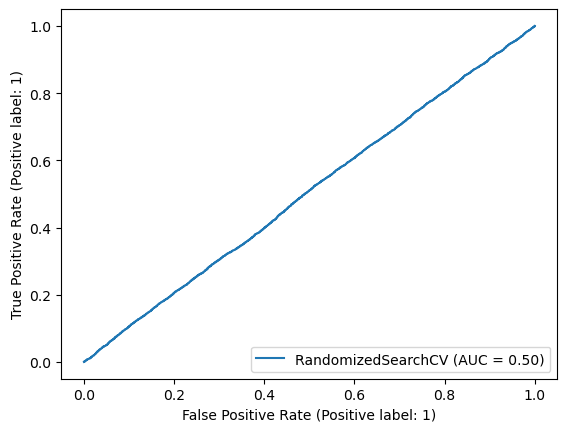

In [92]:
# Plot ROC curve and calculate and AUC metric
plot_roc_curve(rs_log_reg, x_test, y_test)

In [93]:
#Making Predict
y_preds_l = rs_log_reg.predict(x_test)

In [94]:
# Classification report 
print(classification_report(y_test, y_preds_l))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55     11611
           1       0.49      0.38      0.43     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.49     23000
weighted avg       0.50      0.50      0.49     23000



### Hyper Tunning Grid SearchCV by Logistic Regression

In [95]:
#Defining parameters
log_reg_grid = {"C":np.logspace(-4, 4, 20),"solver":["liblinear"]}

#Logistic Regression
np.random.seed(42)
gs_log_reg= GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

#Fitting the model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [96]:
#Printing parameters
print(gs_log_reg.best_params_)

{'C': 0.0001, 'solver': 'liblinear'}


In [97]:
#Printing Score
print(gs_log_reg.score(x_test, y_test))

0.4998695652173913


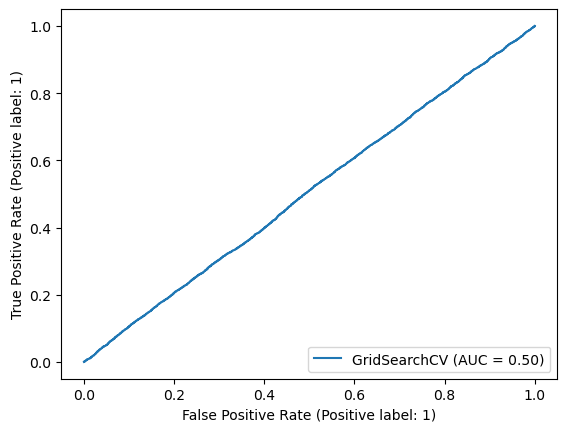

In [98]:
# Plot ROC curve and calculate and AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [99]:
#Making Predict
y_preds_LR = gs_log_reg.predict(x_test)

Logistic Regression Score are as follows:
Accuracy Score :
 0.4998695652173913
Recall Score :
 0.3847572218807621
Precison Score :
 0.49357963505293984
F1 Score :
 0.4324270982385158
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.61      0.55     11611
           1       0.49      0.38      0.43     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.49     23000
weighted avg       0.50      0.50      0.49     23000

Confusion Matrix  :


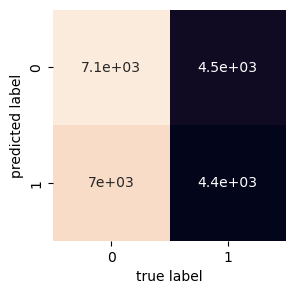

In [100]:
print("Logistic Regression Score are as follows:")
print("=========================================")
LR_accuracy1=accuracy_score(y_test,y_preds_LR ) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',LR_accuracy1) # printing accuracy score

print("=========================================")
LR_recall1=recall_score(y_test,y_preds_LR ) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',LR_recall1) # #printing recall score
print("=========================================")

LR_precision1=precision_score(y_test,y_preds_LR )# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',LR_precision1) # printing precision score

print("=========================================")
LR_f1score1=f1_score(y_test,y_preds_LR )# checking F1_Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',LR_f1score1) # printing F1_score

print("=========================================")
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_preds_LR )) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m' )

def plot_conf_mat(y_test,y_preds_LR ):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds_LR ),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds_LR )

### XG Boost Classifier (Hypertunning Model)

In [101]:
# Set the hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Use GridSearchCV to search over the hyperparameter grid
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_xgb.fit(x_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', grid_search_xgb.best_params_)

# Predict the test set using the best model
y_pred_xgb = grid_search_xgb.predict(x_test)

# Evaluate the model
accuracy = np.mean(y_test == y_pred_xgb)
print('Test accuracy:', accuracy)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Test accuracy: 0.5019130434782608


XG Boost Classifier Score are as follows:
Accuracy Score :
 0.5019130434782608
Recall Score :
 0.3414698393186408
Precison Score :
 0.495729764181007
F1 Score :
 0.40438806280544864
Classification Report  :
               precision    recall  f1-score   support

           0       0.51      0.66      0.57     11611
           1       0.50      0.34      0.40     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.49     23000
weighted avg       0.50      0.50      0.49     23000

Confusion Matrix  :


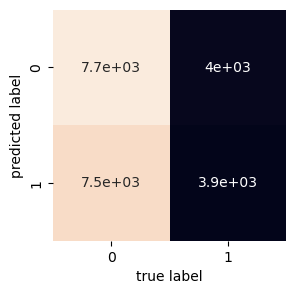

In [102]:
print("XG Boost Classifier Score are as follows:")
print("=========================================")
XG_accuracy1=accuracy_score(y_test,y_pred_xgb) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',XG_accuracy1) # printing accuracy score

print("=========================================")
XG_recall1=recall_score(y_test,y_pred_xgb) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',XG_recall1) # #printing recall score
print("=========================================")

XG_precision1=precision_score(y_test,y_pred_xgb)# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',XG_precision1) # printing precision score
print("=========================================")

XG_f1score1=f1_score(y_test,y_pred_xgb)# checking F1 Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',XG_f1score1) # printing F1 score
print("=========================================")

print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_pred_xgb)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y_pred_xgb):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred_xgb),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_pred_xgb)

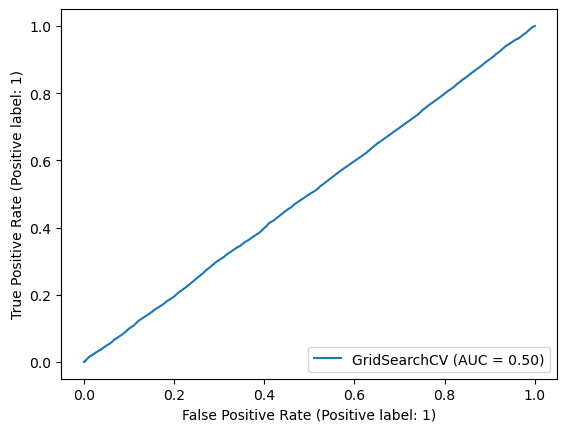

In [103]:
# Plot ROC curve and calculate and AUC metric 
plot_roc_curve(grid_search_xgb, x_test, y_test)

### AdaBoost Classifier (hypertunning Model)

In [104]:
# Set the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)

# Use GridSearchCV to search over the hyperparameter grid
grid_search_ada = GridSearchCV(ada, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_ada.fit(x_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', grid_search_ada.best_params_)

# Predict the test set using the best model
y_pred_ada = grid_search_ada.predict(x_test)

# Evaluate the model
accuracy = np.mean(y_test == y_pred_ada)
print('Test accuracy:', accuracy)

Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}
Test accuracy: 0.5021739130434782


AdaBoost Classifier Score are as follows:
Accuracy Score :
 0.5021739130434782
Recall Score :
 0.16480814821318818
Precison Score :
 0.49200524246395805
F1_Score :
 0.2469087082346751
Classification Report  :
               precision    recall  f1-score   support

           0       0.50      0.83      0.63     11611
           1       0.49      0.16      0.25     11389

    accuracy                           0.50     23000
   macro avg       0.50      0.50      0.44     23000
weighted avg       0.50      0.50      0.44     23000

Confusion Matrix  :


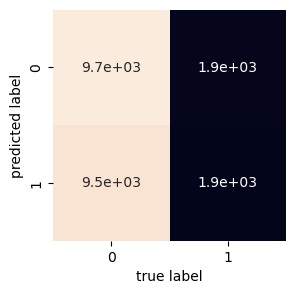

In [105]:
print("AdaBoost Classifier Score are as follows:")
print("=========================================")
ABC_accuracy1=accuracy_score(y_test,y_pred_ada) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',ABC_accuracy1) # printing accuracy score

print("=========================================")
ABC_recall1=recall_score(y_test,y_pred_ada) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',ABC_recall1) # #printing recall score
print("=========================================")

ABC_precision1=precision_score(y_test,y_pred_ada)# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',ABC_precision1) # printing precision score
print("=========================================")

ABC_f1score1=f1_score(y_test,y_pred_ada)# checking F1_Score
print('\033[1m' + 'F1_Score :' + '\033[0m' + '\n',ABC_f1score1) # printing F1_Score
print("=========================================")


print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_pred_ada)) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m')
def plot_conf_mat(y_test,y_pred_ada):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred_ada),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_pred_ada)

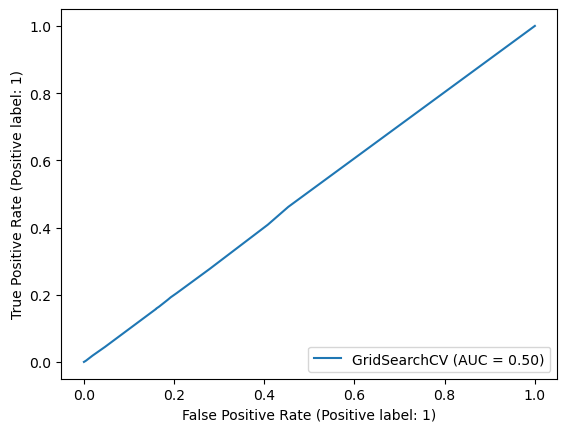

In [106]:
# Plot ROC curve and calculate and AUC metric 
plot_roc_curve(grid_search_ada, x_test, y_test)

In [107]:
models_list1 = ['Logistic Regression','Decision Tree Classifier','XG Boost Classifier','AdaBoost Classifier']
#Creating accuracy_report variable to store accuracy of all the model
accuracy_report=[LR_accuracy1,DTC_accuracy,XG_accuracy,ABC_accuracy]

#Creating recall_report variable to store recall of all the model
recall_report=[LR_recall1,DTC_recall,XG_recall,ABC_recall]

#Creating precision_report variable to store precision of all the model
precision_report=[LR_precision1,DTC_precision,XG_precision,ABC_precision]

#Creating F1_Score_report variable to store F1_Score of all the model
F1_Score_report=[LR_f1score1,DTC_f1score,XG_f1score,ABC_f1score]

# Creating roc_auc_score report variable to store roc_auc_score of all the model
Roc_Auc_report=[0.50,0.50,0.50,0.50]

# Creating model_report dataframe 
model_report1 = pd.DataFrame([models_list1,accuracy_report,recall_report,precision_report,F1_Score_report,Roc_Auc_report]).T

#Creating column for model report
model_report1.columns = ["Model","Accuracy_Score","Recall_Score","Precision_Score","F1_Score","Roc_Auc_score"]

#Sorting value according to Accuracy_score
model_report1.sort_values("Accuracy_Score",ascending=False).reset_index(drop=True)

Model Accuracy_Score Recall_Score Precision_Score  \
0  Decision Tree Classifier       0.505304     0.503819         0.50048   
1       XG Boost Classifier        0.50313     0.488981        0.498255   
2       AdaBoost Classifier       0.502478     0.426376        0.497235   
3       Logistic Regression        0.49987     0.384757         0.49358   

   F1_Score Roc_Auc_score  
0  0.502144           0.5  
1  0.493574           0.5  
2  0.459088           0.5  
3  0.432427           0.5

### Now Using SMOTE Technique we are trying to get increase the accuracy the model 

In [108]:
#lets change dtype target variable from object to integer
customer_record["Location"]=customer_record["Location"].astype("int")

In [109]:
## Defining X and y 
X1 = customer_record.drop(columns = ['Churn']) 
y1 = customer_record['Churn'] ##  target variable or the variable which we have to predict
X_train1,X_test1,y_train1,y_test1=train_test_split(X1, y1,random_state=3)


## Balancing the data

sm=SMOTE()#object creation

print("Acutal Class")
print("**********************************")
print(Counter(y1))# checking count for each class 

X_sm,y_sm=sm.fit_resample(X_train1,y_train1)#applying sampling on target1 variable 


print("**********************************")
print("Smote Class")
print("**********************************")
print(Counter(y_sm))# checking count after sampling for  each class


Acutal Class
**********************************
Counter({0: 50221, 1: 49779})
**********************************
Smote Class
**********************************
Counter({0: 37679, 1: 37679})


In [110]:
#calling Score for Status
Status_model_score1=fit_score(list_of_model=list_of_model, x_train=X_sm, x_test=X_test1, y_train = y_sm, y_test = y_test1)
Status_model_score1

{'Logistic Regression': 0.50728,
 'Support Vector Machine': 0.49864,
 'K-Nearest Neighbors': 0.49452,
 'Random Forest': 0.49852,
 'Decision Tree Classifier': 0.49904,
 'Gradient Boost Classifier': 0.501,
 'XG Boost Classifier': 0.50856,
 'AdaBoost Classifier': 0.50012,
 'MLP Classifier': 0.49644}

After Applying SMOTE technique , Score got decreased of all the model so, now lets do hypertunne on top of that to check accuracy is increasing or not

###  Logistic Regression with SMOTE technique HyperTunning

In [111]:
#Defining parameter Range
log_reg_grid1 = {"C":np.logspace(-4, 4, 20),"solver":["liblinear"]}

#Logistic Regression
np.random.seed(42)
rs_log_reg1 = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid1, cv=5, n_iter=20, verbose=True)

#Fitting the model
rs_log_reg1.fit(X_sm, y_sm)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [112]:
#printing score
print(rs_log_reg1.score(X_test1, y_test1))

0.50596


Logistic Regression Score are as follows:
Accuracy Score :
 0.50596
Recall Score :
 0.5150907047680205
Precison Score :
 0.5042036615070323
F1 Score :
 0.5095890410958904
Classification Report  :
               precision    recall  f1-score   support

           0       0.51      0.50      0.50     12542
           1       0.50      0.52      0.51     12458

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000

Confusion Matrix  :


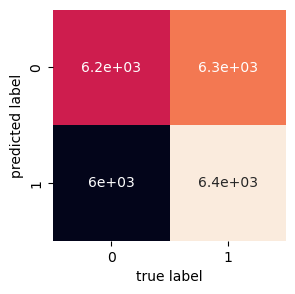

In [113]:
y_preds_LR2=rs_log_reg1.predict(X_test1)

print("Logistic Regression Score are as follows:")
print("=========================================")
LR_accuracy2=accuracy_score(y_test1,y_preds_LR2 ) #checking accuracy
print('\033[1m' + 'Accuracy Score :' + '\033[0m' + '\n',LR_accuracy2) # printing accuracy score

print("=========================================")
LR_recall2=recall_score(y_test1,y_preds_LR2 ) #checking recall
print('\033[1m' + 'Recall Score :' + '\033[0m' + '\n',LR_recall2) # #printing recall score
print("=========================================")

LR_precision2=precision_score(y_test1,y_preds_LR2 )# checking precision
print('\033[1m' + 'Precison Score :' + '\033[0m' + '\n',LR_precision2) # printing precision score

print("=========================================")
LR_f1score2=f1_score(y_test1,y_preds_LR2 )# checking F1_Score
print('\033[1m' + 'F1 Score :' + '\033[0m' + '\n',LR_f1score2) # printing F1_score

print("=========================================")
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test1,y_preds_LR2 )) #recall,precision,f1 scores and accuracy

print("=========================================")
#Display confusion matrix
print('\033[1m' + 'Confusion Matrix  :' + '\033[0m' )

def plot_conf_mat(y_test1,y_preds_LR2 ):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test1,y_preds_LR2 ),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test1,y_preds_LR2 )

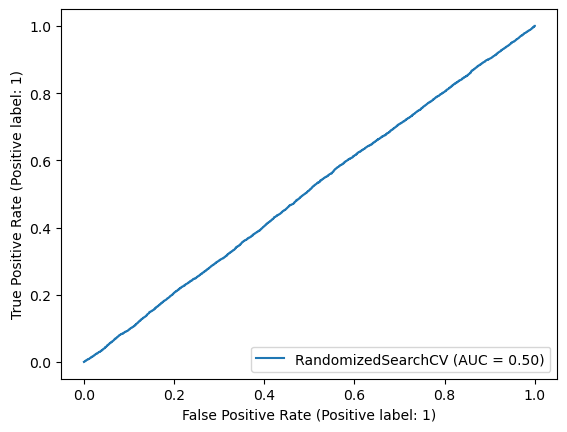

In [114]:
# Plot ROC curve and calculate and AUC metric 
plot_roc_curve(rs_log_reg1, X_test1, y_test1)

# Hyperparameter Tunning in XG  Boost (Using SMOTE Technique)

In [115]:
param_grid1 = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB1=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv1= RandomizedSearchCV(estimator=XGB1, scoring='f1',param_distributions=param_grid1, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv1.fit(X_sm,y_sm)##training data on randomsearch cv
cv_best_params1 = rcv1.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params1})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.4, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.7, 'gamma': 12.8})


In [116]:
XGB1_1=XGBClassifier(reg_lambda= 0.4, reg_alpha=0.1, n_estimators=50, max_depth=10, learning_rate=0.7, gamma=1.28)
XGB1_1.fit(X_sm,y_sm)#training 
y_predict_x1=XGB1_1.predict(X_test1)#testing

print(classification_report(y_test1,y_predict_x1))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     12542
           1       0.50      0.51      0.51     12458

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000



[[6345 6197]
 [6140 6318]]


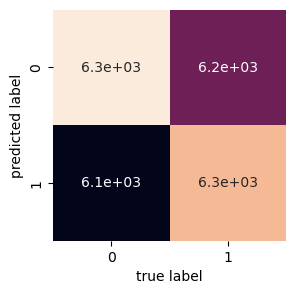

In [119]:
#Display confusion matrix
print(confusion_matrix(y_test1,y_predict_x1))
def plot_conf_mat(y_test1,y_predict_x1):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test1,y_predict_x1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test1,y_predict_x1)

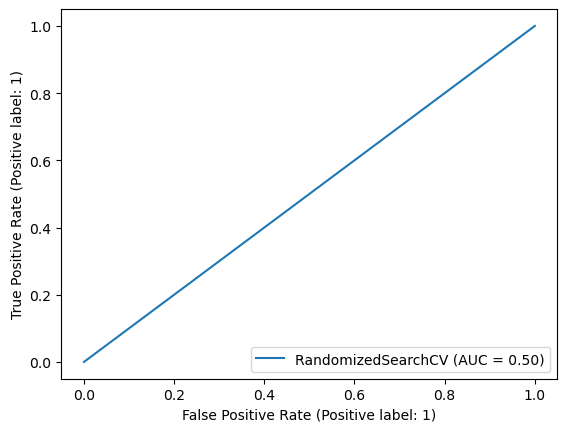

In [117]:
# Plot ROC curve and calculate and AUC metric for h1n1 Vaccine( 1st target Variable)
plot_roc_curve(rcv1, X_test1, y_test1)

## <span style="color:green">Instantiate best model with best hyperparameters In XGBoost Classifier</span>

Cross validated accuracy score 0.5021099787939345
******************************************************
Cross Validated Precision score 0.5020824650263332
*******************************************************
Cross Validated Recall score 0.5035429735554763
*******************************************************
Cross Validated F1-score score 0.5028064561207674
*******************************************************


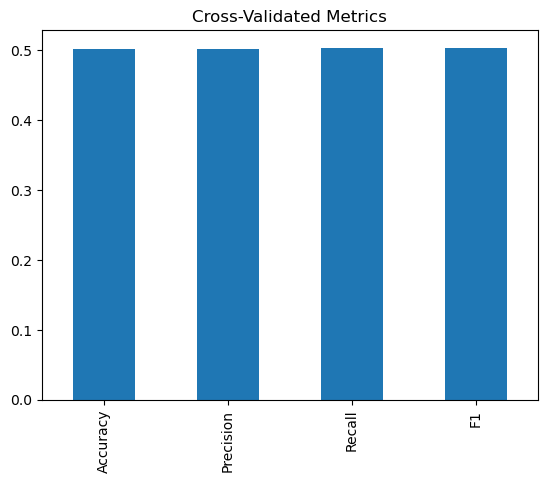

In [120]:
clf1 = XGBClassifier(reg_lambda= 0.4, reg_alpha=0.1, n_estimators=50, max_depth=10, learning_rate=0.7, gamma=1.28)

#Accuracy
cv_acc1 =np.mean(cross_val_score(clf1,X_sm,y_sm,cv=3,scoring="accuracy"))  
print("Cross validated accuracy score",cv_acc1)

print("******************************************************")

# Precision
cv_prec1=np.mean(cross_val_score(clf1,X_sm,y_sm,cv=3,scoring="precision"))
print("Cross Validated Precision score",cv_prec1)

print("*******************************************************")

# Recall
cv_recall1=np.mean(cross_val_score(clf1,X_sm,y_sm,cv=3,scoring="recall"))
print("Cross Validated Recall score",cv_recall1)

print("*******************************************************")

# F1 Score
cv_f11=np.mean(cross_val_score(clf1,X_sm,y_sm,cv=3,scoring="f1"))
print("Cross Validated F1-score score",cv_f11)

print("*******************************************************")

#Printing Cross-Validated Metrics
cv_metrics1 = pd.DataFrame({"Accuracy": cv_acc1,"Precision": cv_prec1,"Recall": cv_recall1,"F1": cv_f11},index=[0])
cv_metrics1.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance

In [121]:
clf1.fit(X_sm,y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.28, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.7, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [122]:
clf1.feature_importances_

array([0.16690408, 0.14858381, 0.16264714, 0.16845717, 0.17980656,
       0.17360123], dtype=float32)

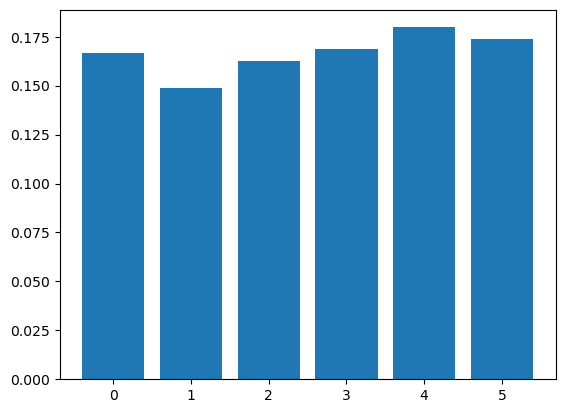

In [123]:
plt.bar(range(len(clf1.feature_importances_)), clf1.feature_importances_)
plt.show()

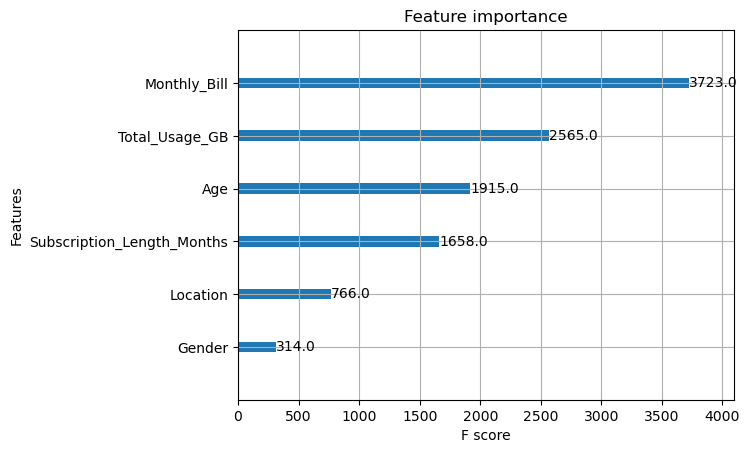

In [124]:
from xgboost import plot_importance
plot_importance(clf1)
plt.show()

### Performance Report of best Model (XGBoost Classifier)

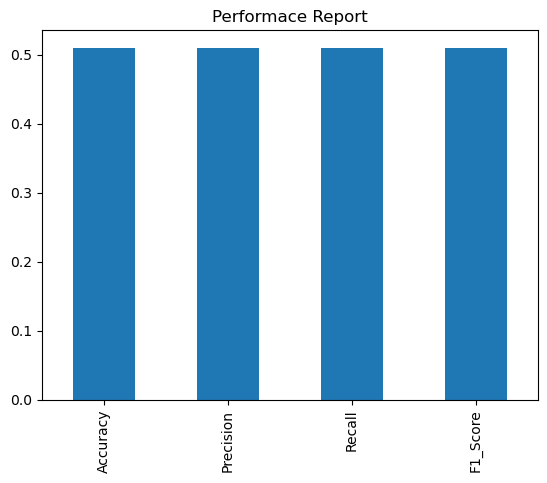

In [126]:
#Printing bar plot for best Model
cv_metrics = pd.DataFrame({"Accuracy": 0.51,"Precision" :0.51,"Recall" : 0.51,"F1_Score":0.51},index=[0])
cv_metrics.T.plot.bar(title="Performace Report", legend=False);

## Saving Best Model

In [118]:
import xgboost as xgb
import json

# Save the model to a binary file
XGB1_1.save_model('xgboost_model.model')

# Save the hyperparameters to a JSON file
hyperparameters = XGB1_1.get_params()
with open('xgboost_hyperparameters.json', 'w') as file:
    json.dump(hyperparameters, file)
print(hyperparameters)

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 1.28, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.7, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 10, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 50, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.4, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


## Conclusion

<h2 style="color:green"> Using SMOTE Technique XGBoost Model with hypertune is best model with 50% AUC and accuracy 51% to predict the customer is churned or not.